# MIT Gaia DR3 Hackathon: Testing isochronal models with star clusters

## Introduction: a new era of stellar age-dating.


Stars, like most people, undergo their most dynamic changes during their infancy up to their adolescent years and then settle into adult life.

They are almost always born in groups, out of the (mostly) gas and dust fragments in the sparse interstellar medium. Turbulence and pressure cause these cold clouds to contract, heat, eventually producing proto-stellar cores within the cloud that grow as they accrete material through along filamentary structures, generally taking no more than a few tens of kyr for stars between $0.5-1.0M_{\odot}$. As the core contracts and heats to $T_{c}\sim2000\,{\rm K}$, the first light emerges from the photodissociation of molecular hydrogen and the surrounding gas envelope is partially removed through radiative feedback.

Further heating of the core results in a period of Deuterium burning ($T_{c}\sim10^6\,{\rm K}$) which temporarily slows the contraction and modulates the core temperature for a few Myr, during which the star, now in its pre-main sequence, bulks up in mass. Lithium, an ephemeral element which has a strong spectral absorption feature in red light, and is often used as a youth indicator and stellar clock, is one of the next to burn around $T_{c}\sim2.5\,{\rm MK}$. Eventually, the core reaches $T_{c}\sim15\,{\rm MK}$ and Hydrogen fusion begins, with enough fuel to last several billions of years. This marks a phase of Hydrostatic equilibrium where Gravitational and radiative forces are balanced, and the star is said to be in its main sequence. 

What remains of the cloud that produced the young stars? In most cases, the stellar feedback, particularly from massive stars, removes the gas entirely from the star forming region, although in T-associations (clusters without massive progenitor stars) the gas sometimes forms further generations of young stars. The proto-stars and young pre-main sequence stars within a cloud usually begin with similar global kinematics, and are Gravitationally bound as a cluster. Most clusters don't make it past 100 Myr, some not even past a few Myr. Depending on the cloud mass, density and stellar interactions, dissipative forces scramble the kinematics and cause young clusters to disperse out into the field.

## The Gaia Revolution

### Back when MTV was cool there was HIPPARCOS... 
Once upon a time there was a satellite called *HIPPARCOS*, it was the creme-de-la-creme of 1990s astrometry.
Hipparcos scanned the skies for stars brighter than apparent magnitudes of $V\sim 12.5$, resulting in a catalogue of around 100,000 stars. We'll be dealing with stars with $M=0.5-1.0\,M_{\odot}$. From the HIPPARCOS data what is:

* the distance limit at either end of the mass range?
* the mass limit at 100pc (are there young clusters or associations within 100pc)?
* the mass limit for **NGC2264, $\gamma~$Vel** and **NGC2516** (three of the clusters we'll test in this work)?

### A very quick look-back at previous Gaia releases
Gaia was successfully launched from French Guyana in December 2013 and began collecting data in July 2014.

DR1, released in September 2016 was a kind of trial run for astronomers using measurements of $\sim2\times10^{6}$ objects in the Tycho-2 catalogue to verify that the positions, proper-motions and parallaxes measurements (herein the 5-parameter solution) were making sense. Within a little over 2 years of collecting data, Gaia had improved the precision in each of the 5-parameter solutions by over 3 magnitude orders - a promising sign of things to come!

In April 2018, DR2 changed the game. Its contents merely contained 1.3 billion stars as faint as $G=21$ with 5-parameter solutions with typical precision of $0.01-1$ milli-arcseconds and mmag-precision optical photometry, along with around 7 million radial velocity (RV) measurements to boot!

By the time EDR3 came out in December 2020, there were 34 months of data, which led to $\sim 30\%$ improvements in the statistical errors, but more importantly EDR3 ironed out the minor underlying systematics that astronomers identified in DR2.

### Now it's time for DR3!
[Here's what we can expect](https://www.cosmos.esa.int/web/gaia/dr3)

Personally I'm looking forward to seeing...
* 4x more radial velocities (33 million objects)
* object classification
* Stellar parameters based on MCMC fitting to SEDs

## Isochronal age-dating
### Using evolutionary models
Evolutionary models predict physical stellar parameters (luminosity, temperature, chemical composition) by
solving the stellar structure equations for a given mass and age. 

Evolutionary models predict physical stellar parameters -- luminosity ($L$), effective temperature ($T_{\rm eff}$) and chemical composition -- by solving the stellar structure equations for a given mass and age. In order to test the models with cluster data, these parameters need to be turned into observables so they can be compared in the same plane. This requires conversion from the Hertzsprung-Russell diagram ($L$ versus $T_{\rm eff}$) to the Colour-Magnitude Diagram (absolute $G$ versus $G-K_{\rm s}$, for example).

In principle, all we need to test isochronal models are:
1. A set of observations of high-probability members of a given cluster. **How can we test cluster membership?**
2. Photometry from a minimum of two filters. **What is a photometric filter?**
3. Parallax measurements to convert apparent magnitude to absolute magnitude. **What's the equation for this?**

### Before we begin (1): cluster reddening and extinction
Turns out that space is dusty, especially when we look in directions that point towards nearby star forming regions. Therefore light that passes through dust gets scattered, and since blue photons are more affected, the light appears **redder**. One way astronomers try to de-redden star clusters is to spectroscopically measure their $T_{\rm eff}$ and compare their photometry with synthetic SED templates that have no reddening. In this work we'll use $E(B-V)$ from literature sources that have measured reddening in this way.

### Before we begin (2): what exactly are we fitting again?
Evolutionary models predict the outputs for stars in isolation -- that is to say, single stars. We know from statistical surveys that as many as 1 in 2 stellar systems in clusters can be multiples, which are mainly binaries, but also a small percentage of triples and higher-order systems. For very nearby stars, or those on wide orbits, sometimes we have apriori knowledge of multiplcity status, but most of them in this work are unresolved multiples. **Given that an unresolved equal-mass binary system contributes double the flux, how brighter in magnitude do they appear?**

### The data set
We'll be using high-probability cluster members observed during the Gaia ESO Survey (GES). This mission collected high-resolution spectroscopy for over 100,000 stars across the Milky Way, of which half were targetted as possible members of open clusters. The membership probabilities were calculated by comparing the 3D velocity of each candidate with the distribution observed in the cluster (based on the same GES observations), where radial velocity comes from GES ($\sim$0.5km/s precision) and tangential velocities (in right ascension, $v_{\alpha}$ and declination $v_{\delta}$) are from Gaia EDR3. However, we will take optical photometry from Gaia DR2 because the transformation from the models to the observational plane are based on the DR2 system.

### The models
We'll test two different "flavours". One uses the standard input physics and another is modified to account for magnetic activity, which is generally observed to be universally higher in young pre-MS stars.

**Standard Models**
* Baraffe et al. 2015
* Dotter et al. 2008
* SPOTS models (without spots)

**Magnetic Models**
* Feiden 2016
* Two variants of the SPOTS models$^{*}$

$^{*}$SPOTS models cover the surface of the star with dark spots, where the spot parameters are the spot-to-photosphere temperature ratio and the fraction of flux blocked by the spots.

# OK, let's go!

### First, read in the list of GES candidate members which contains the 3D membership probabilities
This is available (for now) only as table 3 in the supplementary data provided in [Jackson et al. 2022](https://academic.oup.com/mnras/article/509/2/1664/6414548?login=true).

Since Gaia is going offline during the week of the hackathon, I incorporated parallaxes and photometry into this table previously.

### Then, read in a file containing the cluster properties.
These include: Name, age, distance modulus, E(B-V) and number of objects used.

In [1]:
from astropy.table import Table
GES = Table.read("./data/table3_idr6_final_eDR3_DR2.csv")
Clus = Table.read("./data/table1.csv")
GES

CNAME,CLUSTER,FILTER,RA,DEC,FLAG,RV,ERV,TEFFP,KMAGP,LOGL,MEM3D,MEMQG,source_id_EDR3,plx_EDR3,eplx_EDR3,RUWE_EDR3,Gmag_EDR3,BPmag_EDR3,RPmag_EDR3,BPRP_excess_EDR3,eGmag_EDR3,eBPmag_EDR3,eRPmag_EDR3,source_id_DR2,plx_DR2,eplx_DR2,Gmag_DR2,eGmag_DR2,BPmag_DR2,eBPmag_DR2,RPmag_DR2,eRPmag_DR2
str16,str11,int64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64
08511168-4203207,Assc50,665,132.79866,-42.055752,1,81.02,0.3,4671,11.63,0.41,-1.0,-1.0,5524540364686393984,0.2336,0.0363,1.062,16.0505,17.398579,14.914621,1.408,0.002799,0.005912,0.00406,5524540364686393984,0.2708,0.0548,16.076168,0.000681878077373304,17.375555,0.0066870703427719825,14.919462,0.0017285913954128295
08511192-4127169,Assc50,665,132.799667,-41.454693,2,66.27,0.52,5109,12.48,0.18,-1.0,-1.0,5524635128844243968,0.1908,0.0508,0.987,16.894243,18.285133,15.74562,1.414,0.002831,0.013262,0.004495,5524635128844243968,0.1689,0.0701,16.923656,0.0008356111027918426,18.269587,0.0150337242787345,15.743982,0.00424551756317034
08511231-4150351,Assc50,665,132.801285,-41.843082,0,27.89,0.34,5823,12.93,0.16,0.0,0.0,5524591148379630592,0.4674,0.0593,1.127,17.064173,18.28913,15.958334,1.4,0.002861,0.017305,0.004909,5524591148379630592,0.601,0.0853,17.09129,0.0011305814392643132,18.267612,0.02489557872265505,15.952241,0.004261935341937647
08511232-4157275,Assc50,665,132.801331,-41.957638,1,107.55,0.4,4773,12.07,0.26,-1.0,-1.0,5524542013954151168,0.1896,0.0487,0.943,16.71355,18.110022,15.560351,1.418,0.002853,0.012334,0.004108,5524542013954151168,0.0997,0.0704,16.74226,0.0008620245003009283,18.049261,0.01511234682233515,15.558613,0.003117048340936075
08511249-4152158,Assc50,665,132.802048,-41.871056,0,21.79,1.81,3248,14.1,-0.84,0.0,0.0,5524590834841853824,2.2951,0.0922,1.041,17.82502,19.410864,16.61614,1.45,0.003394,0.037224,0.007991,5524590834841853824,2.4639,0.1374,17.848982,0.0025134278656863823,19.19701,0.04186204003190949,16.587622,0.006456276707794162
08511277-4129337,Assc50,665,132.803207,-41.492695,2,59.59,0.28,5088,11.6,0.52,-1.0,-1.0,5524634716527398528,0.2245,0.0308,0.966,15.877316,17.14849,14.766595,1.396,0.002785,0.00484,0.003975,5524634716527398528,0.2018,0.0461,15.901429,0.0005071790156190681,17.148264,0.006821169680002094,14.77339,0.0015030730071592293
08511322-4154240,Assc50,665,132.805084,-41.906666,0,21.18,0.53,4023,12.58,-0.14,0.9999,0.9999,5524543800660535552,1.0796,0.0374,1.028,16.144304,16.936728,15.220944,1.335,0.0098,0.047051,0.021071,5524543800660535552,0.9999,0.0504,16.12586,0.009468433709684178,16.899319,0.0380237806574825,15.183566,0.023422210008051034
08511345-4140012,Assc50,665,132.806046,-41.667,0,25.12,0.36,4359,11.56,0.35,0.9984,0.9987,5524619426443892224,1.1089,0.0221,1.264,14.790024,15.62956,13.873751,1.314,0.003466,0.009611,0.006543,5524619426443892224,1.0926,0.0235,14.801419,0.002734095829891009,15.638686,0.01573386825345536,13.88469,0.007833396256441347
08511361-4123470,Assc50,665,132.806702,-41.396389,0,47.78,0.36,5115,12.78,0.06,0.0,0.0,5524636365794799488,0.5404,0.0383,0.989,16.358519,17.39723,15.356415,1.338,0.00281,0.007711,0.004204,5524636365794799488,0.5222,0.0501,16.379477,0.0007180362417363104,17.396921,0.008990493249111726,15.362186,0.0021968997460451003


### Now we need to select our membership probability threshold.
First let's look at the histogram of membership probabilities...

(array([15320.,     0.,     0.,     0.,     0., 12899.,   266.,   241.,
          370., 12790.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

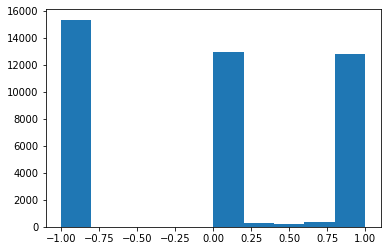

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(GES["MEM3D"])

Yikes! Objects with "PMEM3D = -1" were not considered in the membership analysis. Discard these and plot again!

(array([12725.,   173.,   154.,   113.,   129.,   112.,   176.,   194.,
          339., 12451.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

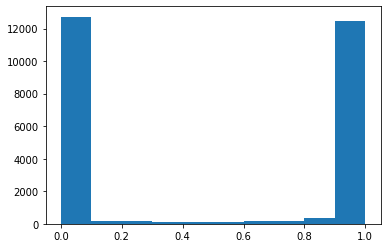

In [3]:
plt.hist(GES[GES["MEM3D"]>=0.0]["MEM3D"])

Interesting, there's a bimodality between very likely contaminants and highly probable members. Try the histogram cut at 0.4.

(array([   84.,    68.,    61.,    93.,   111.,   115.,   122.,   205.,
          404., 12138.]),
 array([0.4008 , 0.46072, 0.52064, 0.58056, 0.64048, 0.7004 , 0.76032,
        0.82024, 0.88016, 0.94008, 1.     ]),
 <BarContainer object of 10 artists>)

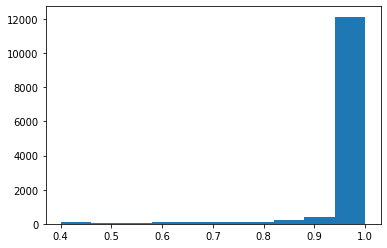

In [4]:
import numpy as np
plt.hist(GES[GES["MEM3D"]>=0.4]["MEM3D"])

Maybe 95% looks "clean". Let's see how many object we'd get in the entire table, then how many in each cluster.

12007
NGC6530 429
Trumpler14 279
Cha_I 90
Rho_Oph 45
NGC2264 504
NGC2244 115
lam_Ori 197
lam_Ori_B35 49
25_Ori 169
Assc50 193
Col197 108
gamma2_Vel 204
IC4665 36
NGC2232 81
NGC2547 181
IC2602 59
NGC2451b 68
NGC6649 63
IC2391 43
NGC2451a 42
NGC6405 57
NGC6067 176
NGC2516 488
Blanco1 126
NGC6709 76
NGC6259 133
NGC6705 549
Br30 51
NGC3532 493
NGC6281 25
NGC4815 53
NGC6633 23


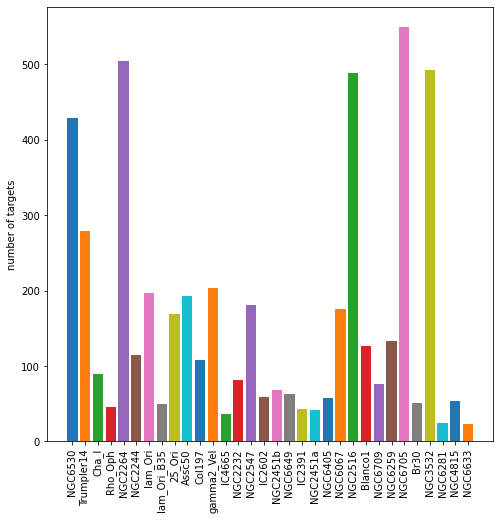

In [5]:
p_th = 0.95
print(np.sum(GES["MEM3D"]>p_th))
fig, ax = plt.subplots(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.ylabel("number of targets")
npass_arr = []
for i in Clus["ClusName"]:
    c = (GES["CLUSTER"]==i) & (GES["MEM3D"]>p_th)
    npass_arr.append(np.sum(c))
    print(i, np.sum(c))
    ax.bar(i, np.sum(c))

For this exercise, let's just pick the clusters that have more than 100 members with membership probabilities higher than 95%.

In [6]:
CGood = Clus[np.array(npass_arr) > 100]
print(CGood["ClusName"])
GES_Pass = GES[((GES["MEM3D"]>p_th) & np.isin(GES["CLUSTER"], CGood["ClusName"]))]
print(f'We have {len(GES_Pass)} stars in {len(np.unique(GES_Pass["CLUSTER"]))} clusters')

 ClusName 
----------
   NGC6530
Trumpler14
   NGC2264
   NGC2244
   lam_Ori
    25_Ori
    Assc50
    Col197
gamma2_Vel
   NGC2547
   NGC6067
   NGC2516
   Blanco1
   NGC6259
   NGC6705
   NGC3532
We have 4344 stars in 16 clusters


## Correcting for reddening/extinction
Since we'll be comparing G versus G-Ks, we need an extinction relationship, one that converts the E(B-V) value into $A_{G}$ and $A_{K_{s}}$.

In [7]:
GES_Pass["A_G"], GES_Pass["A_BP"], GES_Pass["A_RP"], GES_Pass["A_Ks"], GES_Pass["d_mod"] = 0., 0., 0., 0., 0.

for i, c in enumerate(CGood["ClusName"]):
    g = np.where(GES_Pass["CLUSTER"] == c)
    EBV = CGood["EBV_lit"][i]
    AV = 3.09*EBV
#    GES_Pass["A_G"][g]  = AV*((21.- GES_Pass["Gmag_DR2"][g]-GES_Pass["KMAGP"][g]-0.078*AV)/(25. - AV))
    GES_Pass["A_G"][g]  = 0.789*AV
    GES_Pass["A_BP"][g] = 1.002*AV
    GES_Pass["A_RP"][g] = 0.589*AV
    GES_Pass["A_Ks"][g] = 0.078*AV
    GES_Pass["d_mod"][g] = CGood["mM_J22"][i]
    
GES_Pass["Gmag_0"] = GES_Pass["Gmag_DR2"] - GES_Pass["A_G"]
GES_Pass["BPRP_0"] = GES_Pass["BPmag_DR2"]-GES_Pass["RPmag_DR2"] - (GES_Pass["A_BP"] - GES_Pass["A_RP"])
GES_Pass["GKs_0"]  = GES_Pass["Gmag_DR2"]-GES_Pass["KMAGP"] - (GES_Pass["A_G"] - GES_Pass["A_Ks"])

In [8]:
GES_Pass.sort('CLUSTER')

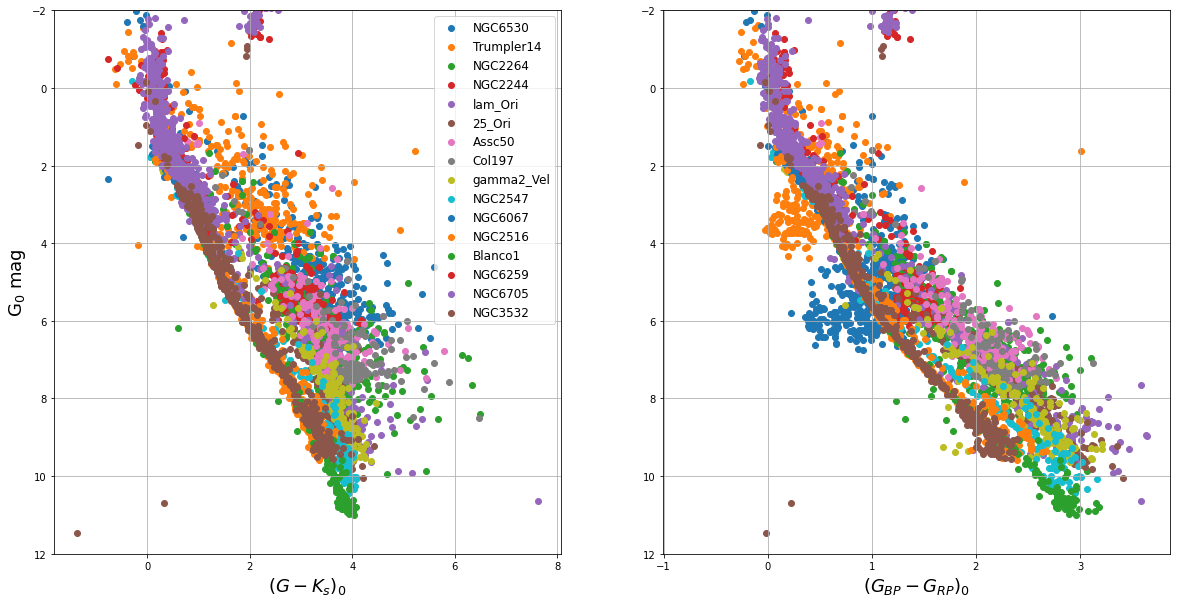

In [9]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_ylim(12,-2)
ax2.set_ylim(12,-2)
ax1.fontsize=20
ax1.set_ylabel("G$_{0}$ mag", fontsize=18)
ax1.set_xlabel("($G-K_{s})_0$", fontsize=18)
ax2.set_xlabel("($G_{BP}-G_{RP})_0$", fontsize=18)
ax1.grid(), ax2.grid()
for i in CGood["ClusName"]:
    g = GES_Pass["CLUSTER"] == i
    ax1.scatter(GES_Pass["GKs_0"][g],  GES_Pass["Gmag_0"][g]-GES_Pass["d_mod"][g], label=i)
    ax2.scatter(GES_Pass["BPRP_0"][g], GES_Pass["Gmag_0"][g]-GES_Pass["d_mod"][g])

ax1.legend(fontsize=12)
plt.show()

# We should probably set another column for $M_G$, the "absolute" magnitude

GES_Pass["M_G"] = GES_Pass["Gmag_0"] - GES_Pass["d_mod"]


## Some last "cleaning steps"
### 1. Choose only G5 - M5 stars
This is because higher-mass stars which have arrived on the main sequence reduce the power in discriminating young stars from their older counterparts. For example, a solar-like G2V star hits the main sequence after 30 Myr.

According to [Eric Mamajek's Color/Teff interpolation table](http://www.pas.rochester.edu/~emamajek/EEM_dwarf_UBVIJHK_colors_Teff.txt) this is:

0.850 < BP-RP < 3.710

1.456 < G-Ks  < 4.250

### Try to clip out giants (with $M_G<0$)

But remember to keep these as two separate datasets, one for $M_G/(G-K_{s})$, another for $M_G/(BP-RP)$.

In [10]:
GES_Pass_GKs  = GES_Pass[(GES_Pass["M_G"]>0) & (GES_Pass["GKs_0"] > 1.456)  & (GES_Pass["GKs_0"] < 4.250)]
GES_Pass_BPRP = GES_Pass[(GES_Pass["M_G"]>0) & (GES_Pass["BPRP_0"] > 0.850) & (GES_Pass["BPRP_0"] < 3.710)]

## Selecting single stars
Since the models are designed to fit single stars, we select the fainter half of cluster members in a sequence.
To do this we fit a 2nd, 3rd and 4th polynomial through the CMD, find the order that results in the best (lowest $\chi^{2}$ fit) and then select targets that lie below this locus.

In [11]:
pol = 0
def make_poly(x,y,f):
    pol = []
    for i, c in enumerate(CGood["ClusName"]):
        g = np.where(f["CLUSTER"] == c)[0]
        if len(g) != 0:
            orders = np.arange(1,5,1)
#            orders = np.arange(2,3,1)
            chi2 = []
            for order in orders:
                p = np.polyfit(x[g], y[g], order)
                chi2.append(np.sum((np.polyval(p, x[g]) - y[g]) ** 2)/(len(g)-(order+1)))
            pol.append(np.polyfit(x[g], y[g], orders[np.argmin(chi2)]))
        else:
            pol.append(np.array([0]))
    return pol

cx = []
for c in CGood["ClusName"]:
    cx.append(c)

pol_GKs  = make_poly(GES_Pass_GKs["GKs_0"], GES_Pass_GKs["M_G"], GES_Pass_GKs)
pol_BPRP = make_poly(GES_Pass_BPRP["BPRP_0"], GES_Pass_BPRP["M_G"], GES_Pass_BPRP)

/tmp/ipykernel_73564/1303254884.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  chi2.append(np.sum((np.polyval(p, x[g]) - y[g]) ** 2)/(len(g)-(order+1)))
/tmp/ipykernel_73564/1303254884.py:22: RankWarning: Polyfit may be poorly conditioned
  pol_GKs  = make_poly(GES_Pass_GKs["GKs_0"], GES_Pass_GKs["M_G"], GES_Pass_GKs)
/tmp/ipykernel_73564/1303254884.py:22: RankWarning: Polyfit may be poorly conditioned
  pol_GKs  = make_poly(GES_Pass_GKs["GKs_0"], GES_Pass_GKs["M_G"], GES_Pass_GKs)
/tmp/ipykernel_73564/1303254884.py:22: RankWarning: Polyfit may be poorly conditioned
  pol_GKs  = make_poly(GES_Pass_GKs["GKs_0"], GES_Pass_GKs["M_G"], GES_Pass_GKs)
/tmp/ipykernel_73564/1303254884.py:22: RankWarning: Polyfit may be poorly conditioned
  pol_GKs  = make_poly(GES_Pass_GKs["GKs_0"], GES_Pass_GKs["M_G"], GES_Pass_GKs)


In [12]:
GES_Pass_GKs["bflag"], GES_Pass_BPRP["bflag"] = 1, 1

def select_singles(x,y,f,p):
    k = 0
    for i, c in enumerate(CGood["ClusName"]):
        g = np.where(f["CLUSTER"] == c)[0]
        if len(p[i]) > 1:
            print(cx[i], p[i], g[0], g)
            z = np.array([g[0] + np.where(np.polyval(p[i], x[g]) - y[g] > 0)]).ravel()
            f["bflag"][z] = 2
        elif len(p[i]) == 1:
            print(c, 'x')
            f["bflag"][g] = 0
            k = k+1
select_singles(GES_Pass_GKs["GKs_0"], GES_Pass_GKs["M_G"], GES_Pass_GKs, pol_GKs)
select_singles(GES_Pass_BPRP["BPRP_0"], GES_Pass_BPRP["M_G"], GES_Pass_BPRP, pol_BPRP)

NGC6530 [  0.41153265  -4.99127726  21.48545606 -37.08172089  24.30378906] 1946 [1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959
 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029
 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043
 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057
 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070 2071
 2072 2073 2074 2075 2076 2077 2078 2079 2080 2081 2082 2083 2084 2085
 2086 2087 2088 2089 2090 2091 2092 2093 2094 2095 2096 2097 2098 2099
 2100 2101 2102 2103 2104 2105 2106 2107 2108 2109 2110 2111 2112 2113
 2114 2115 2116 2117 2118 2119 2120 2121 2122 2123 2124 2125 2126 21

 321 322 323 324 325 326 327 328 329 330 331 332]
Col197 [-0.47833298  4.01083912 -8.67419531  7.97939434] 448 [448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465
 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483
 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501
 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519
 520]
gamma2_Vel [ -0.49948337   5.81408292 -24.28520431  44.9575743  -26.48383784] 2551 [2551 2552 2553 2554 2555 2556 2557 2558 2559 2560 2561 2562 2563 2564
 2565 2566 2567 2568 2569 2570 2571 2572 2573 2574 2575 2576 2577 2578
 2579 2580 2581 2582 2583 2584 2585 2586 2587 2588 2589 2590 2591 2592
 2593 2594 2595 2596 2597 2598 2599 2600 2601 2602 2603 2604 2605 2606
 2607 2608 2609 2610 2611 2612 2613 2614 2615 2616 2617 2618 2619 2620
 2621 2622 2623 2624 2625 2626 2627 2628 2629 2630 2631 2632 2633 2634
 2635 2636 2637 2638 2639 2640 2641 2642 2643 2644 2645 2646 2647 2648
 2649 2650 

 2299 2300 2301 2302 2303 2304 2305 2306 2307 2308 2309 2310 2311]
Trumpler14 [-0.18715054  2.47356648] 2320 [2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332 2333
 2334 2335 2336]
NGC2264 [-0.32241764  0.81665484  2.87034611  0.39816289] 676 [ 676  677  678  679  680  681  682  683  684  685  686  687  688  689
  690  691  692  693  694  695  696  697  698  699  700  701  702  703
  704  705  706  707  708  709  710  711  712  713  714  715  716  717
  718  719  720  721  722  723  724  725  726  727  728  729  730  731
  732  733  734  735  736  737  738  739  740  741  742  743  744  745
  746  747  748  749  750  751  752  753  754  755  756  757  758  759
  760  761  762  763  764  765  766  767  768  769  770  771  772  773
  774  775  776  777  778  779  780  781  782  783  784  785  786  787
  788  789  790  791  792  793  794  795  796  797  798  799  800  801
  802  803  804  805  806  807  808  809  810  811  812  813  814  815
  816  817  818  819  820  821 

 1705 1706 1707 1708 1709 1710 1711 1712 1713 1714 1715 1716 1717 1718]
NGC6067 x
NGC2516 [ -0.99689393   6.67831959 -16.95513995  22.05220768  -5.30832709] 1164 [1164 1165 1166 1167 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177
 1178 1179 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191
 1192 1193 1194 1195 1196 1197 1198 1199 1200 1201 1202 1203 1204 1205
 1206 1207 1208 1209 1210 1211 1212 1213 1214 1215 1216 1217 1218 1219
 1220 1221 1222 1223 1224 1225 1226 1227 1228 1229 1230 1231 1232 1233
 1234 1235 1236 1237 1238 1239 1240 1241 1242 1243 1244 1245 1246 1247
 1248 1249 1250 1251 1252 1253 1254 1255 1256 1257 1258 1259 1260 1261
 1262 1263 1264 1265 1266 1267 1268 1269 1270 1271 1272 1273 1274 1275
 1276 1277 1278 1279 1280 1281 1282 1283 1284 1285 1286 1287 1288 1289
 1290 1291 1292 1293 1294 1295 1296 1297 1298 1299 1300 1301 1302 1303
 1304 1305 1306 1307 1308 1309 1310 1311 1312 1313 1314 1315 1316 1317
 1318 1319 1320 1321 1322 1323 1324 1325 1326 1327 1328 1

In [13]:
GES_Pass_GKs  = GES_Pass_GKs[GES_Pass_GKs["bflag"] != 0]
GES_Pass_BPRP = GES_Pass_BPRP[GES_Pass_BPRP["bflag"] != 0]
print("GKs Clusters")
for i in np.unique(GES_Pass_GKs["CLUSTER"]):
    print(i, len(GES_Pass_GKs[((GES_Pass_GKs["CLUSTER"]==i) & (GES_Pass_GKs["bflag"]==1))]))

print("\n"*2)
print("BPRP Clusters")
for i in np.unique(GES_Pass_BPRP["CLUSTER"]):
    print(i, len(GES_Pass_BPRP[((GES_Pass_BPRP["CLUSTER"]==i) & (GES_Pass_BPRP["bflag"]==1))]))
print("\n"*2)
for i in np.unique(GES_Pass_BPRP["CLUSTER"]):
    print(i, len(GES_Pass_BPRP[((GES_Pass_BPRP["CLUSTER"]==i))]))

GKs Clusters
25_Ori 92
Assc50 93
Blanco1 63
Col197 42
NGC2244 64
NGC2264 251
NGC2516 245
NGC2547 92
NGC3532 198
NGC6259 1
NGC6530 220
NGC6705 18
Trumpler14 111
gamma2_Vel 113
lam_Ori 98



BPRP Clusters
25_Ori 97
Assc50 100
Blanco1 59
Col197 60
NGC2244 63
NGC2264 261
NGC2516 265
NGC2547 96
NGC3532 184
NGC6530 162
NGC6705 4
Trumpler14 10
gamma2_Vel 88
lam_Ori 100



25_Ori 160
Assc50 186
Blanco1 116
Col197 105
NGC2244 109
NGC2264 488
NGC2516 401
NGC2547 154
NGC3532 300
NGC6530 293
NGC6705 8
Trumpler14 17
gamma2_Vel 198
lam_Ori 194


In [14]:
GES_Final_GKs  = GES_Pass_GKs
GES_Final_BPRP = GES_Pass_BPRP

def remove_low_popn(f):
    x = np.array([f[f["CLUSTER"] == i]["CNAME"]
                  for i in np.unique(f["CLUSTER"])
                  if len(f[((f["CLUSTER"]==i) & (f["bflag"]==1))])<10], dtype=object)
    for i in range(len(x)):
        print(x)
        if len(x)>1:
            for j in range(len(x[i].data)):
                z = np.where([f["CNAME"] == str(x[i].data[j])])
                f.remove_rows([z[1]])
        else:
            for j in x.ravel():
                print(j, len(x))
                z = np.where([f["CNAME"] == str(j)])
                f.remove_rows([z[1]])

zap = remove_low_popn(GES_Final_GKs)
zap = remove_low_popn(GES_Final_BPRP)


pol_GKs_f  = []
pol_BPRP_f = []
print("GKs Clusters")
for i in np.unique(GES_Final_GKs["CLUSTER"]):
    if i in cx:
        pol_GKs_f.append(pol_GKs[np.where(np.array(cx)==i)[0][0]])
    print(i, len(GES_Final_GKs[((GES_Final_GKs["CLUSTER"]==i) & (GES_Final_GKs["bflag"]==1))]))
print("\n"*2)

print("BPRP Clusters")
for i in np.unique(GES_Final_BPRP["CLUSTER"]):
    if i in cx:
        pol_BPRP_f.append(pol_BPRP[np.where(np.array(cx)==i)[0][0]])
    print(i, len(GES_Final_BPRP[((GES_Final_BPRP["CLUSTER"]==i) & (GES_Final_BPRP["bflag"]==1))]))

[['17005572-4439228' '17004155-4437585']]
17005572-4439228 1


/home/abinks/anaconda3/lib/python3.9/site-packages/astropy/table/table.py:2522: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


17004155-4437585 1
[['18511406-0613078' '18510687-0613424' '18510636-0611016'
  '18513879-0620558' '18511755-0613173' '18505027-0615531'
  '18505019-0621276' '18505881-0620296']]
18511406-0613078 1
18510687-0613424 1
18510636-0611016 1
18513879-0620558 1
18511755-0613173 1
18505027-0615531 1
18505019-0621276 1
18505881-0620296 1
GKs Clusters
25_Ori 92
Assc50 93
Blanco1 63
Col197 42
NGC2244 64
NGC2264 251
NGC2516 245
NGC2547 92
NGC3532 198
NGC6530 220
NGC6705 18
Trumpler14 111
gamma2_Vel 113
lam_Ori 98



BPRP Clusters
25_Ori 97
Assc50 100
Blanco1 59
Col197 60
NGC2244 63
NGC2264 261
NGC2516 265
NGC2547 96
NGC3532 184
NGC6530 162
Trumpler14 10
gamma2_Vel 88
lam_Ori 100


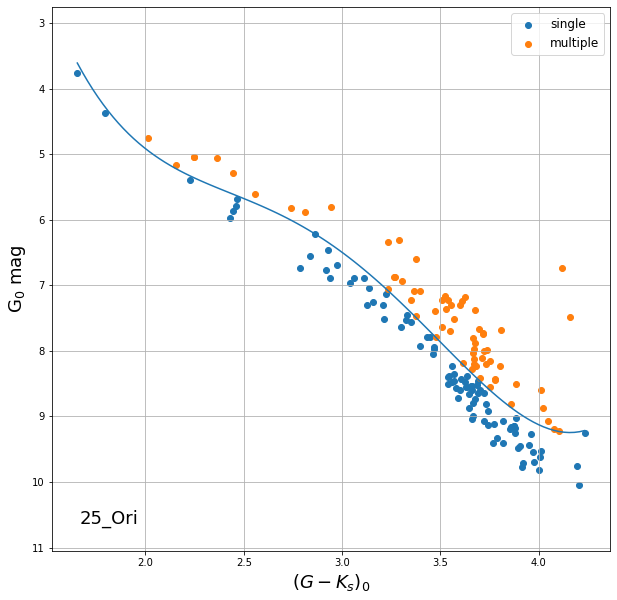

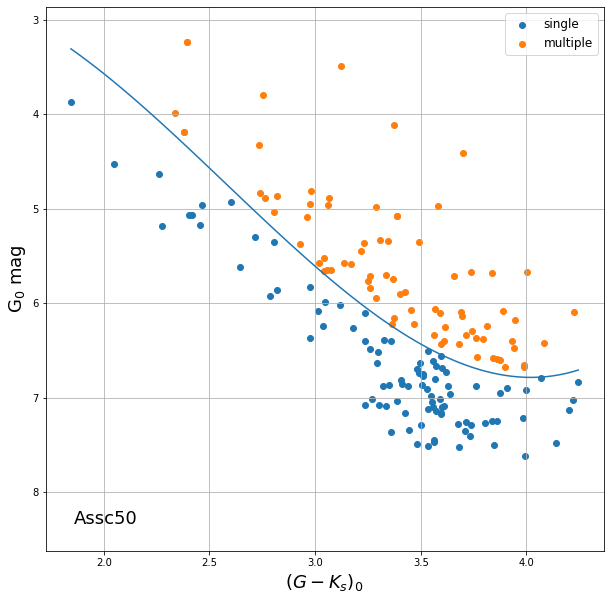

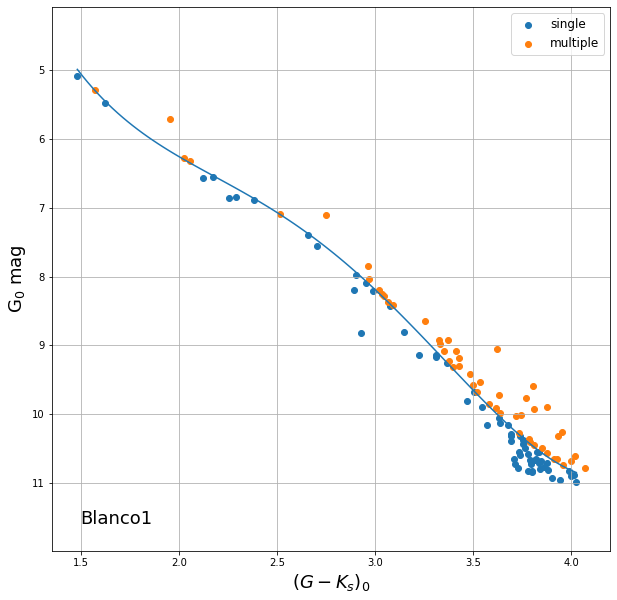

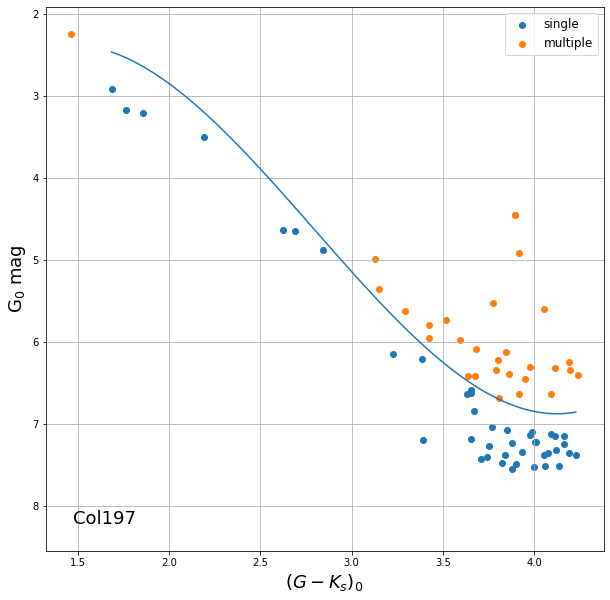

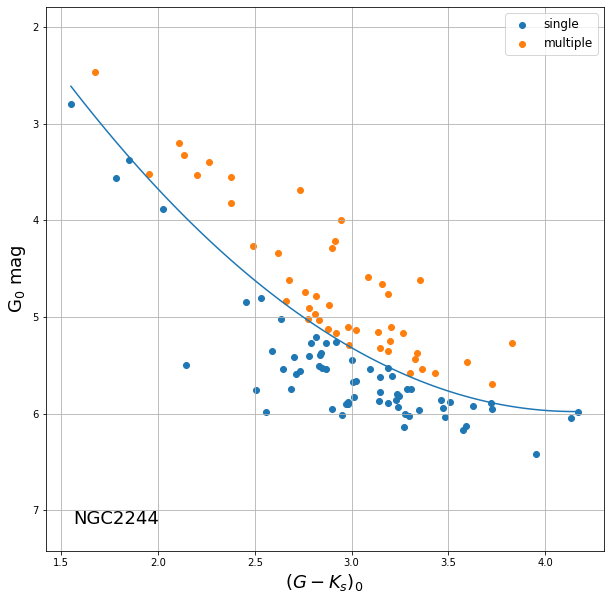

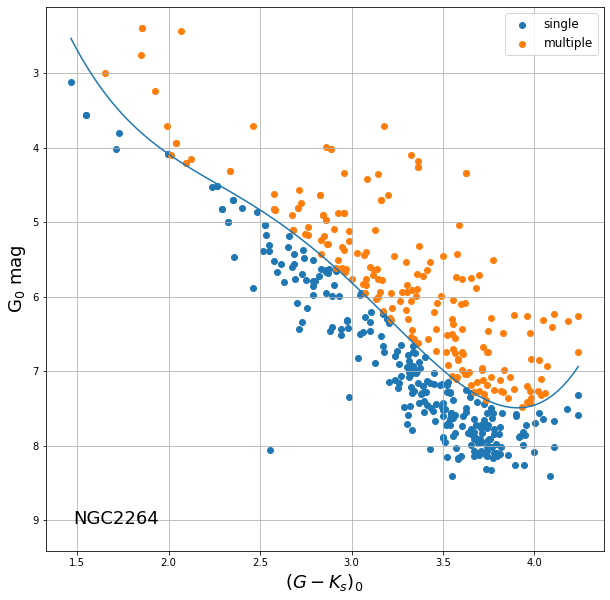

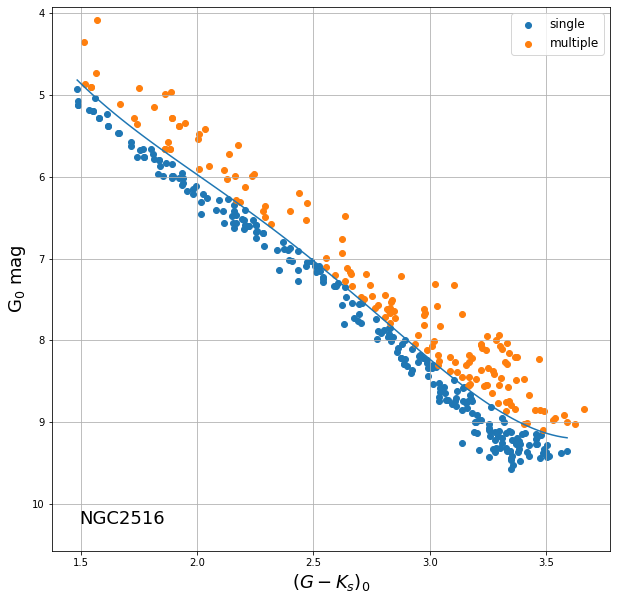

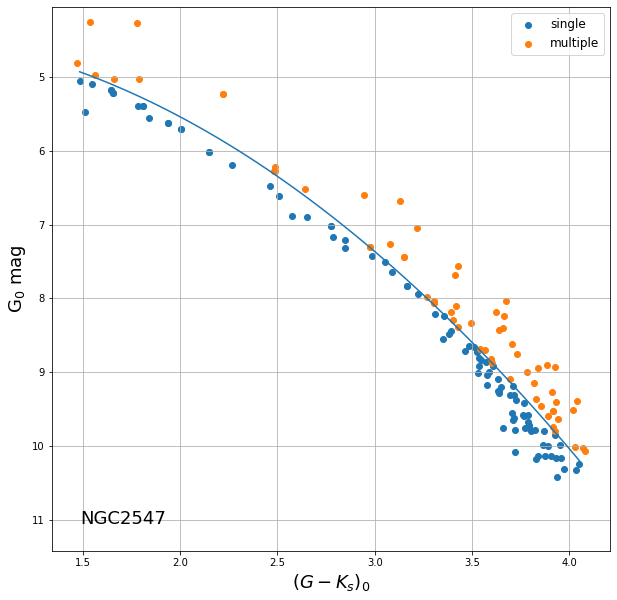

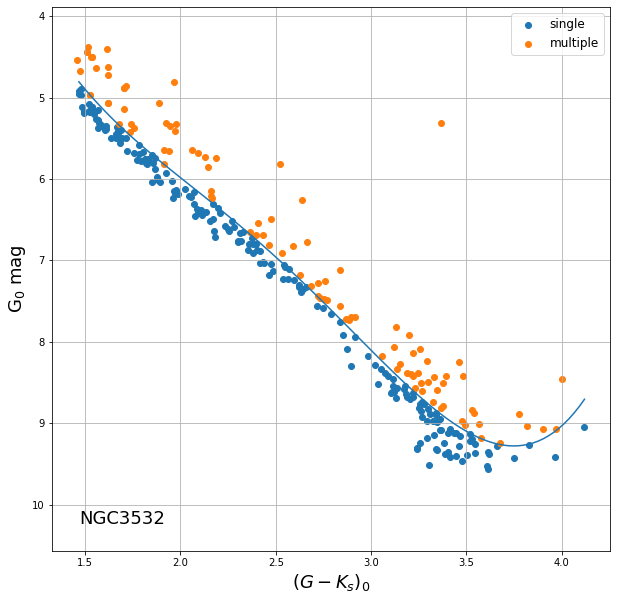

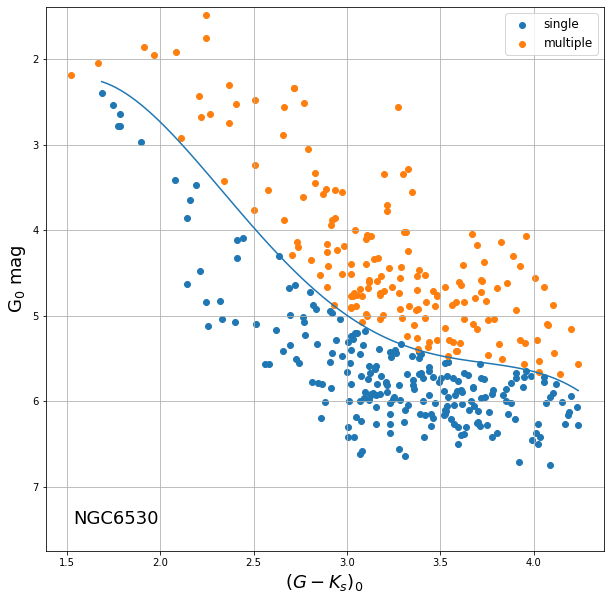

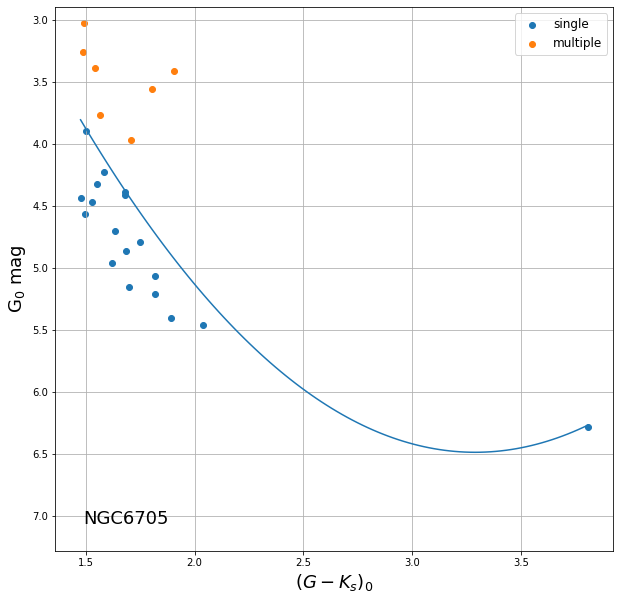

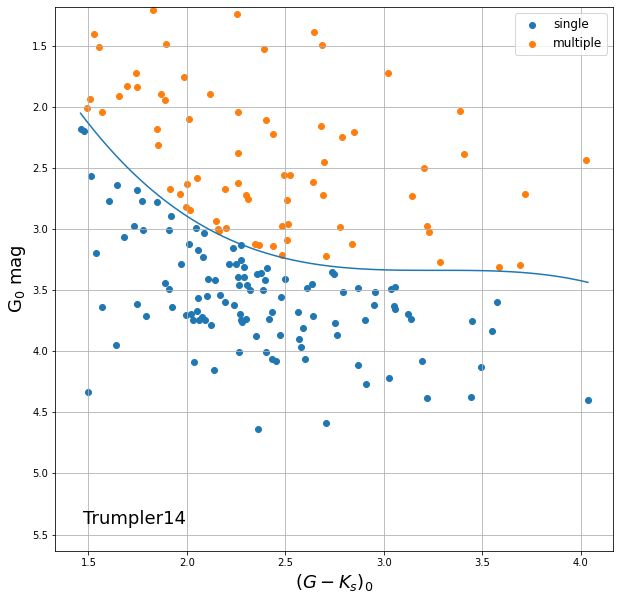

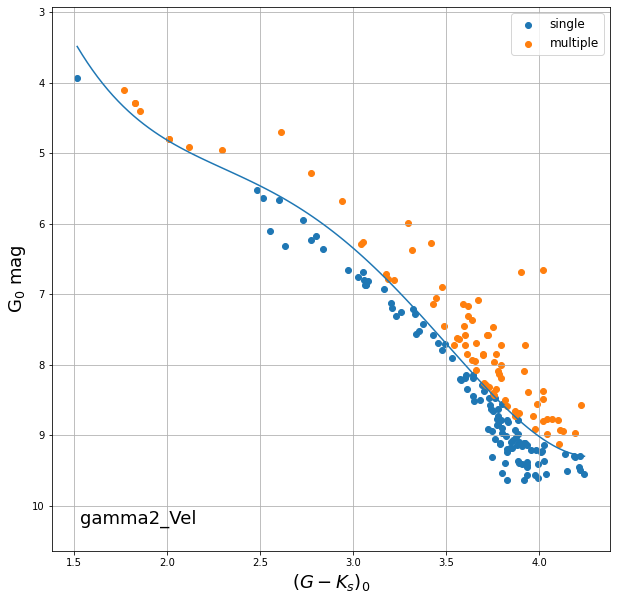

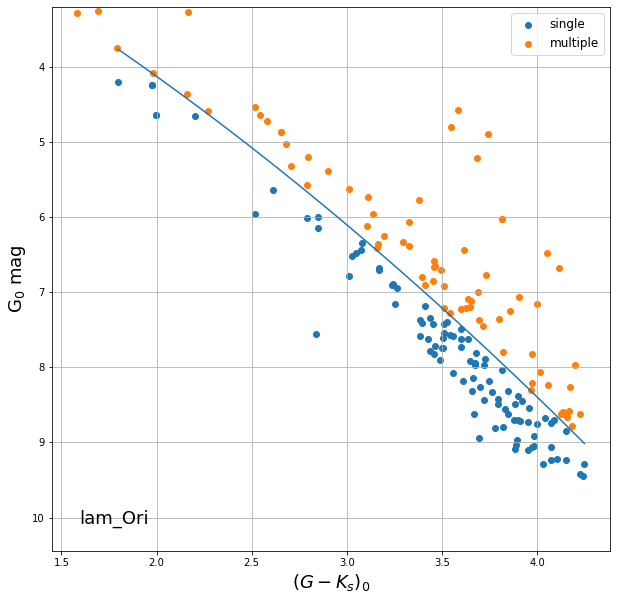

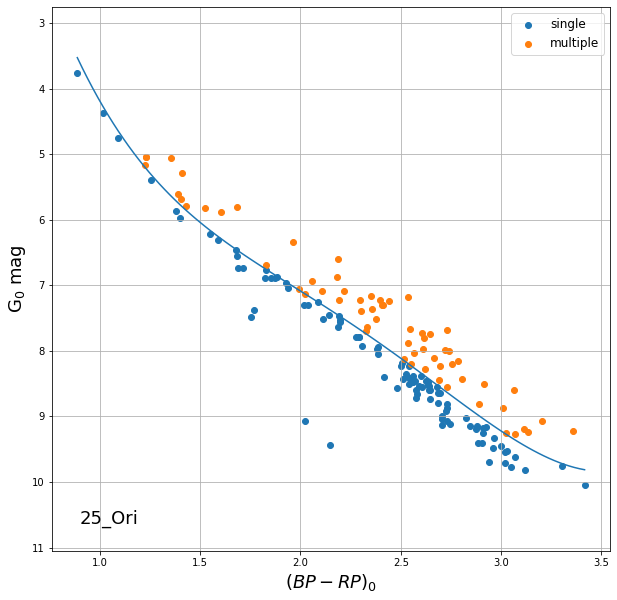

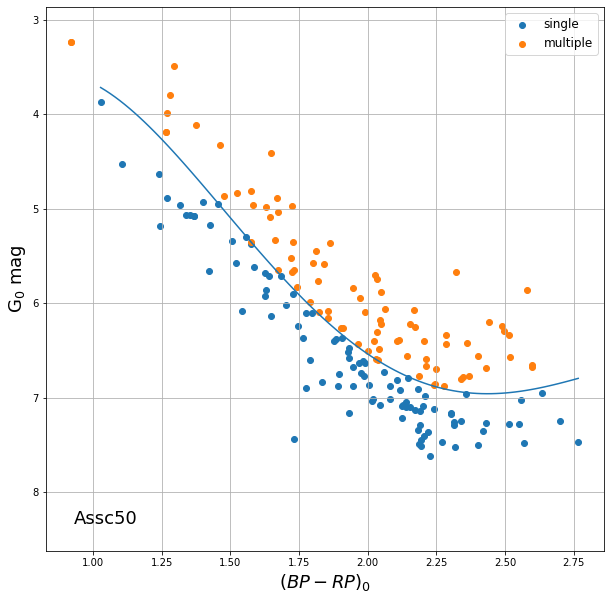

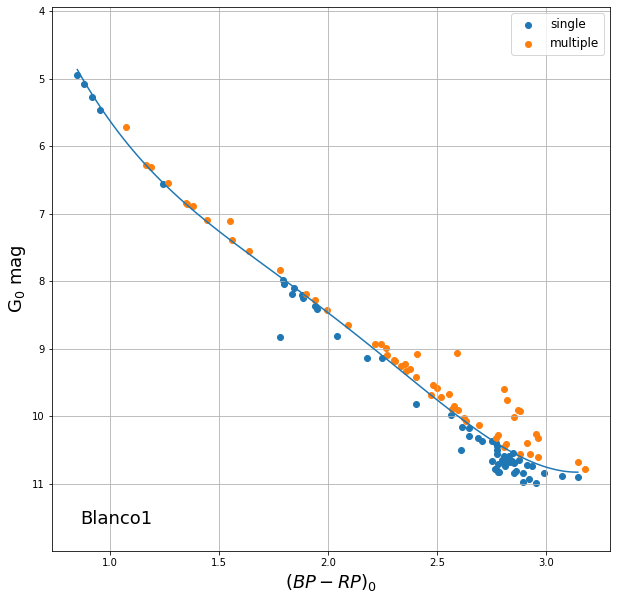

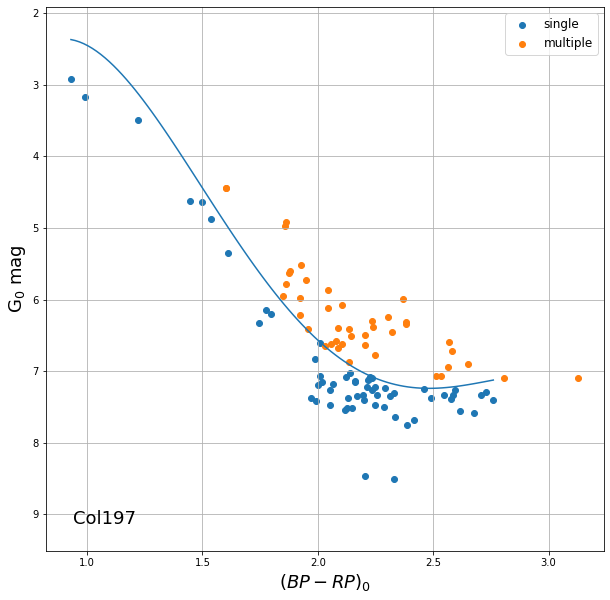

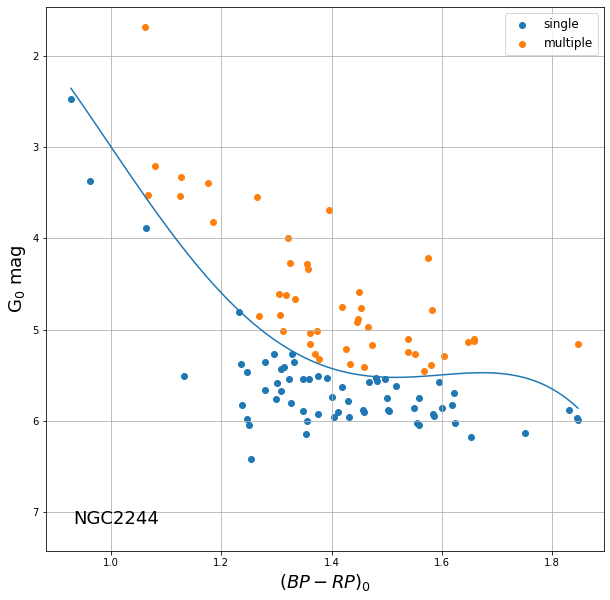

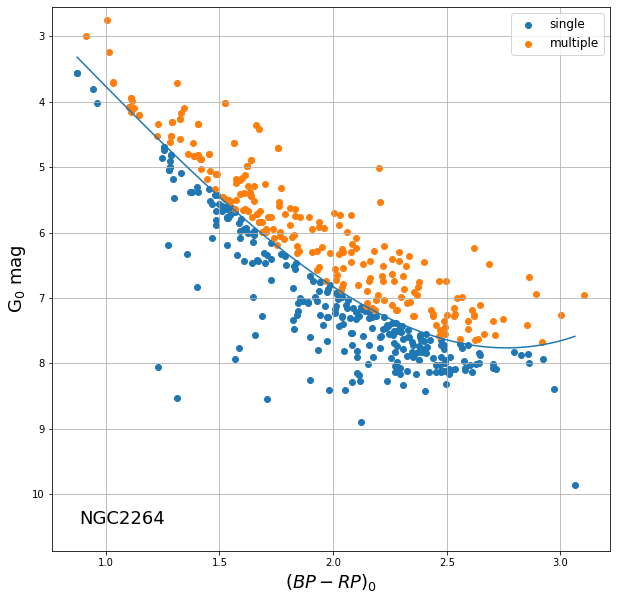

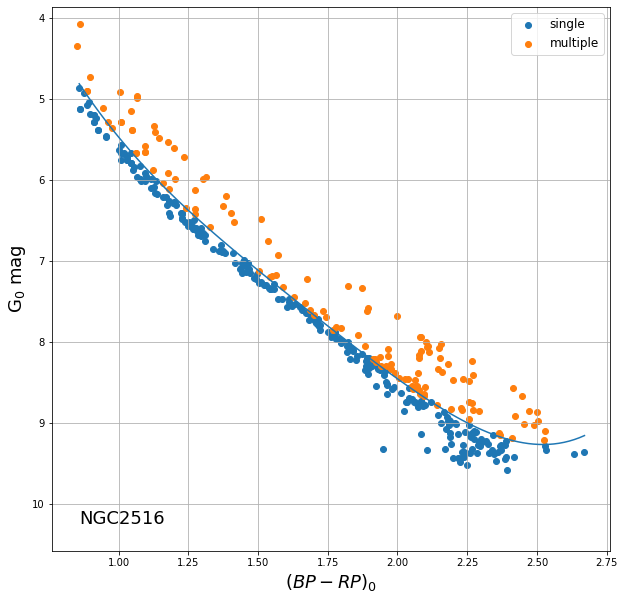

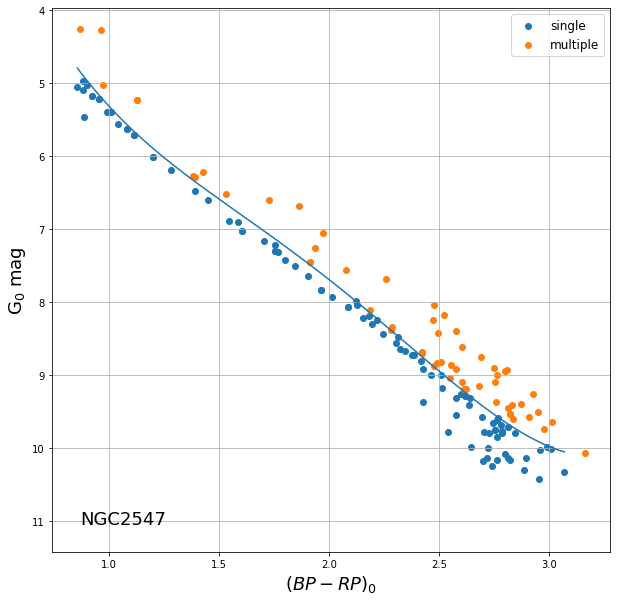

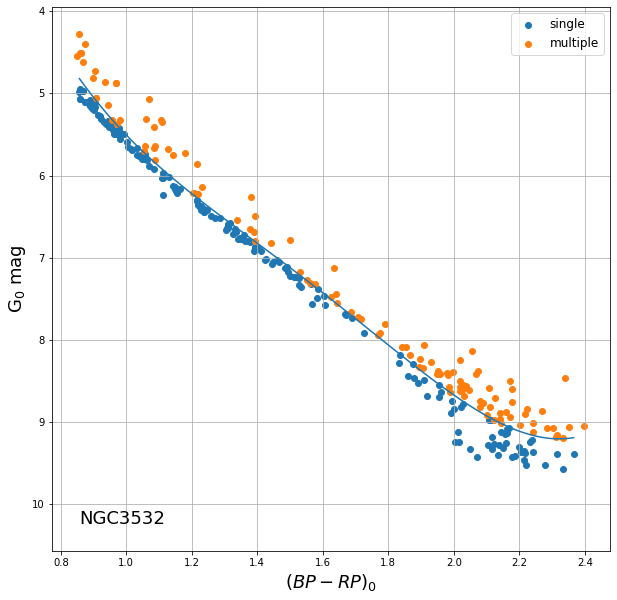

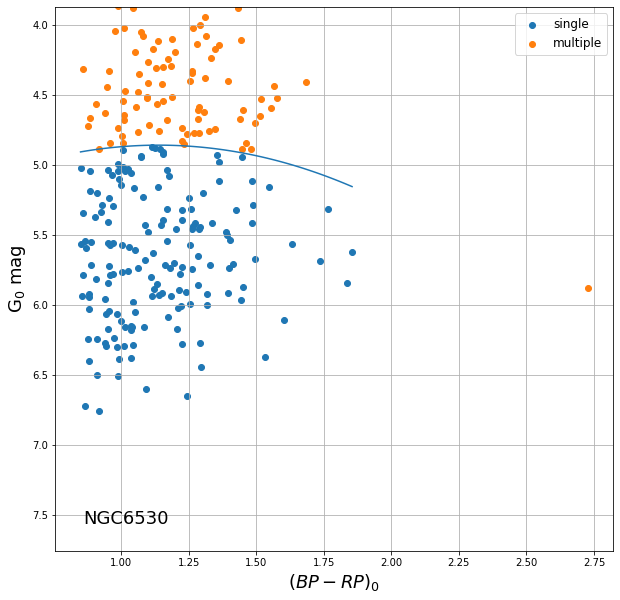

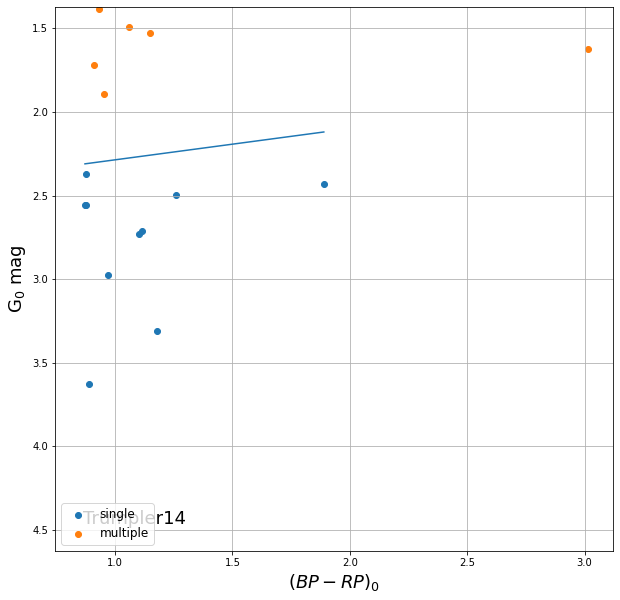

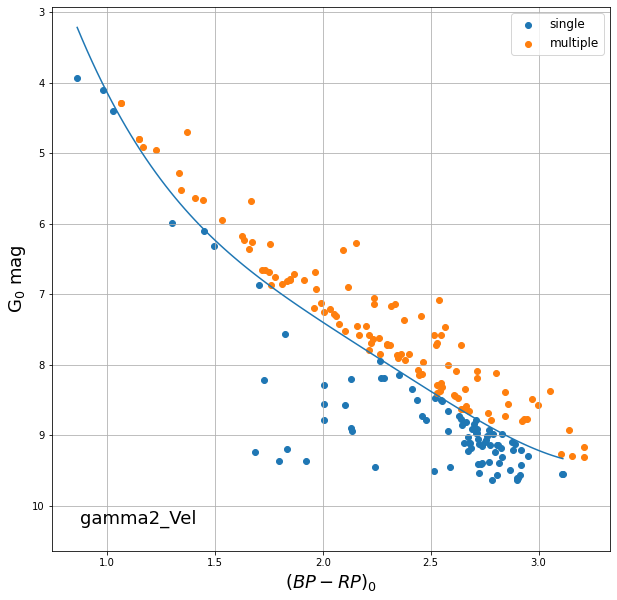

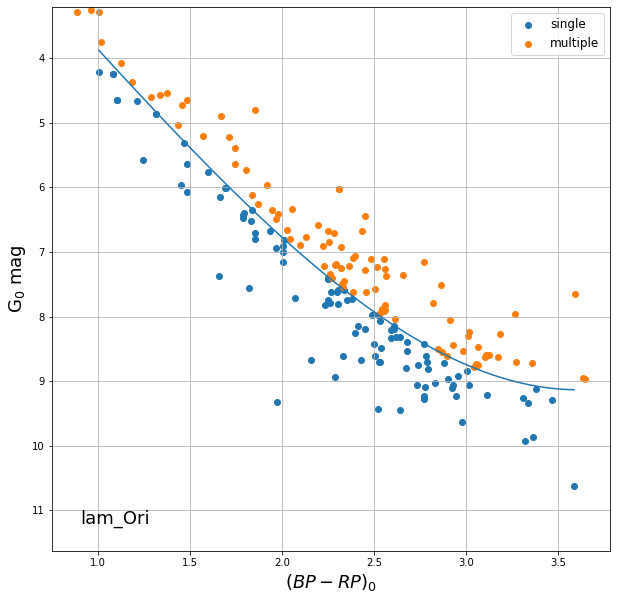

In [15]:
def make_plots_single_stars(f, CMD, pol):
    for h, i in enumerate(np.unique(f["CLUSTER"])):
        s = ((f["CLUSTER"] == i) & (f["bflag"] == 1))
        b = ((f["CLUSTER"] == i) & (f["bflag"] == 2))
        fig, ax = plt.subplots(figsize=(10,10))
        ax.set_ylim(max(f[s]["M_G"])+1,min(f[s]["M_G"])-1)
        ax.fontsize=20
        ax.set_ylabel("G$_{0}$ mag", fontsize=18)
        ax.set_xlabel(CMD[0], fontsize=18)
        ax.grid()
        xl = np.linspace(min(f[s][CMD[1]]), max(f[s][CMD[1]]), 100)
        ax.plot(xl, np.polyval(pol[h], xl))
        ax.text(0.05, 0.05, i, transform=ax.transAxes, fontsize=18)
        ax.scatter(f[s][CMD[1]], f[s]["M_G"], label='single')
        ax.scatter(f[b][CMD[1]], f[b]["M_G"], label='multiple')
        ax.legend(fontsize=12)
        plt.show()


CMD1 = ["($G-K_{s})_0$", "GKs_0"]
CMD2 = ["($BP-RP)_0$", "BPRP_0"]
make_plots_single_stars(GES_Final_GKs, CMD1, pol_GKs_f)
make_plots_single_stars(GES_Final_BPRP, CMD2, pol_BPRP_f)


## Now we're ready to test some models - and estimate some cluster ages!

In [16]:
def test_iso(data, col, model, CMD, mag, age, mod_name):
    chi2_m = []
    for i in np.unique(data["CLUSTER"]):
        d_in = data[(data["CLUSTER"] == i) & (data["bflag"]==1)]
        chi2_0 = 0
        chi2_a = []
        k=0
        model = model[model[age] % 0.5 == 0]

        for j in np.unique(model[age]):
            x_age = model[age] == j
            mincol_age, maxcol_age = min(model[x_age][CMD]), max(model[x_age][CMD])
            g = (d_in[col] > mincol_age) & (d_in[col] < maxcol_age)
            x, y = model[x_age][CMD], model[x_age][mag]
            f = interp1d(x, y, kind='linear')
            x_int = d_in[col][g]
            y_int = f(x_int)
            chi2_r = np.sum((y_int - d_in["M_G"][g])**2/(len(g)-1))
            chi2_a.append([chi2_r, j, i, mod_name])           
            print(i, j, chi2_r)
            if chi2_r > chi2_0:
                k=k+1
                if k > 10:
                    break
            else:
                k=0
            chi2_0 = chi2_r
        chi2_a = np.array(chi2_a)
        chi2_m.append(chi2_a[np.argmin(chi2_a[0:,0])])
    return chi2_m


import glob
from scipy.interpolate import interp1d


model_list = glob.glob("./models/*.iso")


G_mod    = ["Gmag", "Gmag_int", "G_int", "absG"]
GKs_mod  = ["GKs", "GKs_int", "GKs_int", "GKs"]
BPRP_mod = ["BPRP", "BPRP_in", "BPRP_int", "BPRP"]
age      = ['agemod', 'agemod', 'agemod', 'age']

res_GKs = []
for i, x in enumerate(model_list):
    print(i, x)
    model = Table.read(x, format='ascii')
    if x == model_list[0]:
        model["GKs"] = model["Gmag"]-model["Ksmag"]
        model["BPRP"] = model["BPmag"]-model["RPmag"]
    if x == model_list[3]:
        model = model[model["beta"]==0.3]
    res_GKs.append(test_iso(GES_Final_GKs, "GKs_0", model, GKs_mod[i], G_mod[i], age[i], i))

0 ./models/BHAC15.iso
['CNAME', 'CLUSTER', 'FILTER', 'RA', 'DEC', 'FLAG', 'RV', 'ERV', 'TEFFP', 'KMAGP', 'LOGL', 'MEM3D', 'MEMQG', 'source_id_EDR3', 'plx_EDR3', 'eplx_EDR3', 'RUWE_EDR3', 'Gmag_EDR3', 'BPmag_EDR3', 'RPmag_EDR3', 'BPRP_excess_EDR3', 'eGmag_EDR3', 'eBPmag_EDR3', 'eRPmag_EDR3', 'source_id_DR2', 'plx_DR2', 'eplx_DR2', 'Gmag_DR2', 'eGmag_DR2', 'BPmag_DR2', 'eBPmag_DR2', 'RPmag_DR2', 'eRPmag_DR2', 'A_G', 'A_BP', 'A_RP', 'A_Ks', 'd_mod', 'Gmag_0', 'BPRP_0', 'GKs_0', 'M_G', 'bflag']
25_Ori 1.0 4.127691904999189
25_Ori 1.5 2.9051775080754285
25_Ori 2.0 1.8651311274129347
25_Ori 2.5 1.4043100082426159
25_Ori 3.0 1.0094591773685546
25_Ori 3.5 0.7779215255433327
25_Ori 4.0 0.5802967718144408
25_Ori 4.5 0.44900325247956485
25_Ori 5.0 0.3362525692351929
25_Ori 5.5 0.2724387402672157
25_Ori 6.0 0.21636051668296316
25_Ori 6.5 0.17289215933555693
25_Ori 7.0 0.14177077749226571
25_Ori 7.5 0.12069932577500676
25_Ori 8.0 0.11234702880248346
25_Ori 8.5 0.11140672440929336
25_Ori 9.0 0.11528

NGC2264 3.0 0.28203151881187094
NGC2264 3.5 0.27519692697310855
NGC2264 4.0 0.2967321679990197
NGC2264 4.5 0.3304774260342363
NGC2264 5.0 0.38368831603560716
NGC2264 5.5 0.42711716928977655
NGC2264 6.0 0.48132135593705166
NGC2264 6.5 0.5450949492090543
NGC2264 7.0 0.6184209478358689
NGC2264 7.5 0.7028724644002033
NGC2264 8.0 0.7963594955333347
NGC2264 8.5 0.8627802230850667
NGC2264 9.0 0.9338438551495625
['CNAME', 'CLUSTER', 'FILTER', 'RA', 'DEC', 'FLAG', 'RV', 'ERV', 'TEFFP', 'KMAGP', 'LOGL', 'MEM3D', 'MEMQG', 'source_id_EDR3', 'plx_EDR3', 'eplx_EDR3', 'RUWE_EDR3', 'Gmag_EDR3', 'BPmag_EDR3', 'RPmag_EDR3', 'BPRP_excess_EDR3', 'eGmag_EDR3', 'eBPmag_EDR3', 'eRPmag_EDR3', 'source_id_DR2', 'plx_DR2', 'eplx_DR2', 'Gmag_DR2', 'eGmag_DR2', 'BPmag_DR2', 'eBPmag_DR2', 'RPmag_DR2', 'eRPmag_DR2', 'A_G', 'A_BP', 'A_RP', 'A_Ks', 'd_mod', 'Gmag_0', 'BPRP_0', 'GKs_0', 'M_G', 'bflag']
NGC2516 1.0 7.575637659953266
NGC2516 1.5 6.329401050362182
NGC2516 2.0 5.267240812214248
NGC2516 2.5 4.77344560378497

NGC2547 21.0 0.18354715839216654
NGC2547 21.5 0.1893371774307646
NGC2547 22.0 0.19607547957115737
NGC2547 22.5 0.2051601589730244
NGC2547 23.0 0.2150501532924755
NGC2547 23.5 0.22487413625339328
NGC2547 24.0 0.2361610686832372
NGC2547 24.5 0.24828779834853237
['CNAME', 'CLUSTER', 'FILTER', 'RA', 'DEC', 'FLAG', 'RV', 'ERV', 'TEFFP', 'KMAGP', 'LOGL', 'MEM3D', 'MEMQG', 'source_id_EDR3', 'plx_EDR3', 'eplx_EDR3', 'RUWE_EDR3', 'Gmag_EDR3', 'BPmag_EDR3', 'RPmag_EDR3', 'BPRP_excess_EDR3', 'eGmag_EDR3', 'eBPmag_EDR3', 'eRPmag_EDR3', 'source_id_DR2', 'plx_DR2', 'eplx_DR2', 'Gmag_DR2', 'eGmag_DR2', 'BPmag_DR2', 'eBPmag_DR2', 'RPmag_DR2', 'eRPmag_DR2', 'A_G', 'A_BP', 'A_RP', 'A_Ks', 'd_mod', 'Gmag_0', 'BPRP_0', 'GKs_0', 'M_G', 'bflag']
NGC3532 1.0 5.273513390681781
NGC3532 1.5 4.399465301746756
NGC3532 2.0 3.5804904591308846
NGC3532 2.5 3.2012028232354193
NGC3532 3.0 2.8412806423933
NGC3532 3.5 2.653397187790376
NGC3532 4.0 2.480025837068831
NGC3532 4.5 2.300226900355679
NGC3532 5.0 2.145468008779

gamma2_Vel 8.5 0.25248875935887866
gamma2_Vel 9.0 0.29088321250817306
gamma2_Vel 9.5 0.3341649194256884
gamma2_Vel 10.0 0.3846950939351174
gamma2_Vel 10.5 0.4261939657824614
gamma2_Vel 11.0 0.47129413834139217
gamma2_Vel 11.5 0.5205593407689318
gamma2_Vel 12.0 0.5726165376213634
['CNAME', 'CLUSTER', 'FILTER', 'RA', 'DEC', 'FLAG', 'RV', 'ERV', 'TEFFP', 'KMAGP', 'LOGL', 'MEM3D', 'MEMQG', 'source_id_EDR3', 'plx_EDR3', 'eplx_EDR3', 'RUWE_EDR3', 'Gmag_EDR3', 'BPmag_EDR3', 'RPmag_EDR3', 'BPRP_excess_EDR3', 'eGmag_EDR3', 'eBPmag_EDR3', 'eRPmag_EDR3', 'source_id_DR2', 'plx_DR2', 'eplx_DR2', 'Gmag_DR2', 'eGmag_DR2', 'BPmag_DR2', 'eBPmag_DR2', 'RPmag_DR2', 'eRPmag_DR2', 'A_G', 'A_BP', 'A_RP', 'A_Ks', 'd_mod', 'Gmag_0', 'BPRP_0', 'GKs_0', 'M_G', 'bflag']
lam_Ori 1.0 2.209632913560508
lam_Ori 1.5 1.3246040649434279
lam_Ori 2.0 0.677797967145347
lam_Ori 2.5 0.43266994656502883
lam_Ori 3.0 0.26045843151992204
lam_Ori 3.5 0.18707122686616123
lam_Ori 4.0 0.1558613198580031
lam_Ori 4.5 0.15558224014791

Col197 2.0 0.15858271470499843
Col197 2.5 0.38072286236516767
Col197 3.0 0.7083404478755403
Col197 3.5 1.0551491373139146
Col197 4.0 1.4544560446602084
Col197 4.5 1.8471678129559788
Col197 5.0 2.2479665206144266
Col197 5.5 2.5954351985595667
Col197 6.0 2.8065446104802656
Col197 6.5 3.120563469350479
Col197 7.0 3.4523865543747103
['CNAME', 'CLUSTER', 'FILTER', 'RA', 'DEC', 'FLAG', 'RV', 'ERV', 'TEFFP', 'KMAGP', 'LOGL', 'MEM3D', 'MEMQG', 'source_id_EDR3', 'plx_EDR3', 'eplx_EDR3', 'RUWE_EDR3', 'Gmag_EDR3', 'BPmag_EDR3', 'RPmag_EDR3', 'BPRP_excess_EDR3', 'eGmag_EDR3', 'eBPmag_EDR3', 'eRPmag_EDR3', 'source_id_DR2', 'plx_DR2', 'eplx_DR2', 'Gmag_DR2', 'eGmag_DR2', 'BPmag_DR2', 'eBPmag_DR2', 'RPmag_DR2', 'eRPmag_DR2', 'A_G', 'A_BP', 'A_RP', 'A_Ks', 'd_mod', 'Gmag_0', 'BPRP_0', 'GKs_0', 'M_G', 'bflag']
NGC2244 1.0 0.2993495371904058
NGC2244 1.5 0.21025659122824103
NGC2244 2.0 0.27812290483856983
NGC2244 2.5 0.4172668673719678
NGC2244 3.0 0.5773281614955006
NGC2244 3.5 0.7274518700811149
NGC2244

NGC2516 83.5 0.0649261081967111
NGC2516 84.0 0.06498902222697858
NGC2516 84.5 0.06509187178980037
NGC2516 85.0 0.06516038694606319
NGC2516 85.5 0.06518627747159604
NGC2516 86.0 0.0654282017138475
NGC2516 86.5 0.06546621534326275
NGC2516 87.0 0.06554477511006629
NGC2516 87.5 0.06574985305735893
NGC2516 88.0 0.06594828901005727
NGC2516 88.5 0.0660944631397136
NGC2516 89.0 0.06630576300172986
['CNAME', 'CLUSTER', 'FILTER', 'RA', 'DEC', 'FLAG', 'RV', 'ERV', 'TEFFP', 'KMAGP', 'LOGL', 'MEM3D', 'MEMQG', 'source_id_EDR3', 'plx_EDR3', 'eplx_EDR3', 'RUWE_EDR3', 'Gmag_EDR3', 'BPmag_EDR3', 'RPmag_EDR3', 'BPRP_excess_EDR3', 'eGmag_EDR3', 'eBPmag_EDR3', 'eRPmag_EDR3', 'source_id_DR2', 'plx_DR2', 'eplx_DR2', 'Gmag_DR2', 'eGmag_DR2', 'BPmag_DR2', 'eBPmag_DR2', 'RPmag_DR2', 'eRPmag_DR2', 'A_G', 'A_BP', 'A_RP', 'A_Ks', 'd_mod', 'Gmag_0', 'BPRP_0', 'GKs_0', 'M_G', 'bflag']
NGC2547 1.0 7.57450085898156
NGC2547 1.5 5.405017045393946
NGC2547 2.0 4.189293173441524
NGC2547 2.5 3.4221884083496037
NGC2547 3.0 2

NGC6705 2.5 0.08895646280746443
NGC6705 3.0 0.12450552670255825
NGC6705 3.5 0.15866594958878746
NGC6705 4.0 0.19423209239872158
NGC6705 4.5 0.22627829251403936
NGC6705 5.0 0.2584889327723509
NGC6705 5.5 0.28639060731338056
NGC6705 6.0 0.3155201056005535
['CNAME', 'CLUSTER', 'FILTER', 'RA', 'DEC', 'FLAG', 'RV', 'ERV', 'TEFFP', 'KMAGP', 'LOGL', 'MEM3D', 'MEMQG', 'source_id_EDR3', 'plx_EDR3', 'eplx_EDR3', 'RUWE_EDR3', 'Gmag_EDR3', 'BPmag_EDR3', 'RPmag_EDR3', 'BPRP_excess_EDR3', 'eGmag_EDR3', 'eBPmag_EDR3', 'eRPmag_EDR3', 'source_id_DR2', 'plx_DR2', 'eplx_DR2', 'Gmag_DR2', 'eGmag_DR2', 'BPmag_DR2', 'eBPmag_DR2', 'RPmag_DR2', 'eRPmag_DR2', 'A_G', 'A_BP', 'A_RP', 'A_Ks', 'd_mod', 'Gmag_0', 'BPRP_0', 'GKs_0', 'M_G', 'bflag']
Trumpler14 1.0 0.6749477960917245
Trumpler14 1.5 0.9641338332885405
Trumpler14 2.0 1.1565969929396136
Trumpler14 2.5 1.3049895416077195
Trumpler14 3.0 1.4048808490213065
Trumpler14 3.5 1.5198628015477458
Trumpler14 4.0 1.534639975054628
Trumpler14 4.5 1.5706203618687204
T

Blanco1 22.5 1.327334658467157
Blanco1 23.0 1.2788367185062528
Blanco1 23.5 1.231974441040346
Blanco1 24.0 1.1856530322142278
Blanco1 24.5 1.1667734544963992
Blanco1 25.0 1.1227487383564703
Blanco1 25.5 1.0833493668245149
Blanco1 26.0 1.0425506231801018
Blanco1 26.5 1.0040757136536473
Blanco1 27.0 0.9688464989690574
Blanco1 27.5 0.932354894993396
Blanco1 28.0 0.8976872195023641
Blanco1 28.5 0.8655224102731031
Blanco1 29.0 0.8316711086355965
Blanco1 29.5 0.801270019453206
Blanco1 30.0 0.7713291190698273
Blanco1 30.5 0.7433270561819154
Blanco1 31.0 0.7181390106214447
Blanco1 31.5 0.7128180056476384
Blanco1 32.0 0.6897614891830575
Blanco1 32.5 0.6662789946774418
Blanco1 33.0 0.643110366782825
Blanco1 33.5 0.6206827943366208
Blanco1 34.0 0.5994620174674848
Blanco1 34.5 0.5964650906832012
Blanco1 35.0 0.578511879343637
Blanco1 35.5 0.5588151069874401
Blanco1 36.0 0.5406935055346158
Blanco1 36.5 0.576718430063624
Blanco1 37.0 0.5571343054203128
Blanco1 37.5 0.5401975908202259
Blanco1 38.0 0.

NGC2516 8.0 1.0608184132931266
NGC2516 8.5 1.0311706345161014
NGC2516 9.0 1.029760563114506
NGC2516 9.5 1.073980723659806
NGC2516 10.0 1.0299574935848155
NGC2516 10.5 0.9921582392628173
NGC2516 11.0 0.9571490630795474
NGC2516 11.5 0.9226733713739733
NGC2516 12.0 0.8912637810441116
NGC2516 12.5 0.8764209783057461
NGC2516 13.0 0.8623737201616
NGC2516 13.5 0.8553406895200577
NGC2516 14.0 0.8598854297163854
NGC2516 14.5 0.8472551028194757
NGC2516 15.0 0.83514895625759
NGC2516 15.5 0.8268641639306806
NGC2516 16.0 0.8136693285716606
NGC2516 16.5 0.8141545536084014
NGC2516 17.0 0.7988053901184846
NGC2516 17.5 0.7759668328618448
NGC2516 18.0 0.7751608123102136
NGC2516 18.5 0.7634517753492933
NGC2516 19.0 0.768938475383836
NGC2516 19.5 0.7647697310683441
NGC2516 20.0 0.7561622732376397
NGC2516 20.5 0.7373465646251152
NGC2516 21.0 0.7213460401032871
NGC2516 21.5 0.7221407699337052
NGC2516 22.0 0.7259947151895715
NGC2516 22.5 0.7171706604082057
NGC2516 23.0 0.7116462190264684
NGC2516 23.5 0.69500

NGC2516 133.0 0.08129350288988754
NGC2516 133.5 0.08162097035335666
NGC2516 134.0 0.08184205863000008
NGC2516 134.5 0.0820651288261016
NGC2516 135.0 0.08193795835955799
NGC2516 135.5 0.08229084191382216
NGC2516 136.0 0.08260437530892722
NGC2516 136.5 0.0828367214374516
NGC2516 137.0 0.08317840257115103
NGC2516 137.5 0.08335933149366578
NGC2516 138.0 0.08341406362144047
NGC2516 138.5 0.08376767660606187
NGC2516 139.0 0.0841169779893016
NGC2516 139.5 0.0842735933549913
NGC2516 140.0 0.08423722231092619
NGC2516 140.5 0.08462938884056889
NGC2516 141.0 0.08516768794775688
NGC2516 141.5 0.08543138271666442
NGC2516 142.0 0.08594990984348652
NGC2516 142.5 0.08592758189079965
NGC2516 143.0 0.08610213434440073
NGC2516 143.5 0.08668974599806964
NGC2516 144.0 0.08671416599254565
NGC2516 144.5 0.08694385145796785
NGC2516 145.0 0.08710247531736362
NGC2516 145.5 0.08740954637473655
NGC2516 146.0 0.08752332706026553
NGC2516 146.5 0.08800195125742089
NGC2516 147.0 0.08854479354693057
NGC2516 147.5 0.08

NGC3532 59.5 0.21666685207803715
NGC3532 60.0 0.21362955719432328
NGC3532 60.5 0.2183379751787128
NGC3532 61.0 0.21516509373416692
NGC3532 61.5 0.21664053443131717
NGC3532 62.0 0.21357961852450877
NGC3532 62.5 0.2102097043317287
NGC3532 63.0 0.20776234570050467
NGC3532 63.5 0.20461942538436295
NGC3532 64.0 0.20220577470910753
NGC3532 64.5 0.19895156344793072
NGC3532 65.0 0.19657966990717682
NGC3532 65.5 0.19445802989203329
NGC3532 66.0 0.191514582931486
NGC3532 66.5 0.18943975752841735
NGC3532 67.0 0.186873213602283
NGC3532 67.5 0.18497759187547091
NGC3532 68.0 0.18291138606082513
NGC3532 68.5 0.18052697817598506
NGC3532 69.0 0.17601260701020877
NGC3532 69.5 0.17362942469303788
NGC3532 70.0 0.17189864079621225
NGC3532 70.5 0.1696990471451805
NGC3532 71.0 0.16767839712699703
NGC3532 71.5 0.1661391564063045
NGC3532 72.0 0.16271993114271568
NGC3532 72.5 0.16142398984536346
NGC3532 73.0 0.16000640541916122
NGC3532 73.5 0.15879389557762402
NGC3532 74.0 0.15516310111905618
NGC3532 74.5 0.154

['CNAME', 'CLUSTER', 'FILTER', 'RA', 'DEC', 'FLAG', 'RV', 'ERV', 'TEFFP', 'KMAGP', 'LOGL', 'MEM3D', 'MEMQG', 'source_id_EDR3', 'plx_EDR3', 'eplx_EDR3', 'RUWE_EDR3', 'Gmag_EDR3', 'BPmag_EDR3', 'RPmag_EDR3', 'BPRP_excess_EDR3', 'eGmag_EDR3', 'eBPmag_EDR3', 'eRPmag_EDR3', 'source_id_DR2', 'plx_DR2', 'eplx_DR2', 'Gmag_DR2', 'eGmag_DR2', 'BPmag_DR2', 'eBPmag_DR2', 'RPmag_DR2', 'eRPmag_DR2', 'A_G', 'A_BP', 'A_RP', 'A_Ks', 'd_mod', 'Gmag_0', 'BPRP_0', 'GKs_0', 'M_G', 'bflag']
25_Ori 1.0 4.350160198418548
25_Ori 1.5 3.4965849542180147
25_Ori 2.0 2.835831897646056
25_Ori 2.5 2.3092375872982287
25_Ori 3.0 1.8807207103095576
25_Ori 3.5 1.5625953577384335
25_Ori 4.0 1.3012257024294362
25_Ori 4.5 1.0919532113494281
25_Ori 5.0 0.9147697611379336
25_Ori 5.5 0.7788842675575777
25_Ori 6.0 0.6630786721483655
25_Ori 6.5 0.5661508523834567
25_Ori 7.0 0.48243379910713696
25_Ori 7.5 0.41058509720642355
25_Ori 8.0 0.3504320499541506
25_Ori 8.5 0.3005421598209227
25_Ori 9.0 0.26058378409805405
25_Ori 9.5 0.22

Blanco1 79.5 0.14149757631720133
Blanco1 80.0 0.13892354954858016
Blanco1 80.5 0.1368390987894171
Blanco1 81.0 0.1347444021942835
Blanco1 81.5 0.13210491994910978
Blanco1 82.0 0.1305337780304862
Blanco1 82.5 0.12828761534119607
Blanco1 83.0 0.12626826834969543
Blanco1 83.5 0.12399373241108272
Blanco1 84.0 0.12170125383074856
Blanco1 84.5 0.12008038968331954
Blanco1 85.0 0.1179680562441746
Blanco1 85.5 0.11641940260298893
Blanco1 86.0 0.11461387392585513
Blanco1 86.5 0.11293393476619991
Blanco1 87.0 0.11142864815465654
Blanco1 87.5 0.1101912669897477
Blanco1 88.0 0.1085985429916169
Blanco1 88.5 0.10696165595767661
Blanco1 89.0 0.10546465287783609
Blanco1 89.5 0.1039720564459938
Blanco1 90.0 0.10266410133488438
Blanco1 90.5 0.10131620517399693
Blanco1 91.0 0.10007294346866395
Blanco1 91.5 0.09810700996562403
Blanco1 92.0 0.09688700681486628
Blanco1 92.5 0.09548210354993973
Blanco1 93.0 0.09431413087206594
Blanco1 93.5 0.09331829858240126
Blanco1 94.0 0.09182380133138283
Blanco1 94.5 0.09

NGC2516 22.0 1.4701319212959616
NGC2516 22.5 1.4311637176710883
NGC2516 23.0 1.389020779847029
NGC2516 23.5 1.351698311142739
NGC2516 24.0 1.3144819818923437
NGC2516 24.5 1.2802167414257117
NGC2516 25.0 1.246916400895386
NGC2516 25.5 1.212778708301268
NGC2516 26.0 1.1794913897741268
NGC2516 26.5 1.1494207885934729
NGC2516 27.0 1.1197949718163105
NGC2516 27.5 1.0908093908067278
NGC2516 28.0 1.0632173309743957
NGC2516 28.5 1.0359135748878614
NGC2516 29.0 1.0090758315217299
NGC2516 29.5 0.9826265290048031
NGC2516 30.0 0.9569664351235623
NGC2516 30.5 0.9330726534528279
NGC2516 31.0 0.9102836144295359
NGC2516 31.5 0.8886126842554174
NGC2516 32.0 0.8656384167255518
NGC2516 32.5 0.8430846014257041
NGC2516 33.0 0.8211347943907472
NGC2516 33.5 0.8012666680331195
NGC2516 34.0 0.7812680206396629
NGC2516 34.5 0.761690948498669
NGC2516 35.0 0.7443067399315713
NGC2516 35.5 0.7271609822389266
NGC2516 36.0 0.7069543608188744
NGC2516 36.5 0.68999978491322
NGC2516 37.0 0.6727107467919431
NGC2516 37.5 0.

NGC2516 145.5 0.03435633740679762
NGC2516 146.0 0.03443647323122104
NGC2516 146.5 0.03447325908073336
NGC2516 147.0 0.03458556100716273
NGC2516 147.5 0.03460827758556607
NGC2516 148.0 0.034613741435536305
NGC2516 148.5 0.0346300120145553
NGC2516 149.0 0.03465382391700825
NGC2516 149.5 0.034763908492157325
NGC2516 150.0 0.034717143333266504
NGC2516 150.5 0.034841752036240584
NGC2516 151.0 0.035014755340184084
NGC2516 151.5 0.03496174160700058
NGC2516 152.0 0.03504321525001353
NGC2516 152.5 0.03507381512518426
NGC2516 153.0 0.035142512433258624
NGC2516 153.5 0.035187954186730985
NGC2516 154.0 0.03530593376951108
NGC2516 154.5 0.03528885403286258
NGC2516 155.0 0.035451015686925845
NGC2516 155.5 0.035419474903429254
NGC2516 156.0 0.03549094925907018
NGC2516 156.5 0.035542312224814916
NGC2516 157.0 0.035568619128573065
NGC2516 157.5 0.035687036745642414
NGC2516 158.0 0.03567937098724161
NGC2516 158.5 0.03565789605762031
NGC2516 159.0 0.03587153181306458
NGC2516 159.5 0.035892425926051894
NG

NGC3532 47.0 0.24127392896045358
NGC3532 47.5 0.23529145631727458
NGC3532 48.0 0.2292940069674631
NGC3532 48.5 0.22403785848572716
NGC3532 49.0 0.21850794888268227
NGC3532 49.5 0.21368184662362424
NGC3532 50.0 0.20896480820314972
NGC3532 50.5 0.204291761324146
NGC3532 51.0 0.19969864599226267
NGC3532 51.5 0.19560338121440785
NGC3532 52.0 0.19120717012756672
NGC3532 52.5 0.18744396388607698
NGC3532 53.0 0.1838553079498499
NGC3532 53.5 0.1800110357471581
NGC3532 54.0 0.17690163655527724
NGC3532 54.5 0.17356469922035653
NGC3532 55.0 0.17087085012623832
NGC3532 55.5 0.16749279096790426
NGC3532 56.0 0.16477684990225527
NGC3532 56.5 0.16201128331672396
NGC3532 57.0 0.15899941819056151
NGC3532 57.5 0.15624678498605854
NGC3532 58.0 0.153730608323256
NGC3532 58.5 0.1510499763853047
NGC3532 59.0 0.14894310755318518
NGC3532 59.5 0.14666612951640318
NGC3532 60.0 0.14478034627421665
NGC3532 60.5 0.142762326157708
NGC3532 61.0 0.14075509966511757
NGC3532 61.5 0.1389122570996702
NGC3532 62.0 0.137060

lam_Ori 8.0 0.09989507673258162
lam_Ori 8.5 0.1071158924757053
lam_Ori 9.0 0.11898676910242853
lam_Ori 9.5 0.1336179590582049
lam_Ori 10.0 0.1512599445196093
lam_Ori 10.5 0.1709004860772588
lam_Ori 11.0 0.19227616948361814
lam_Ori 11.5 0.21575112300884197
lam_Ori 12.0 0.24338727669815702
lam_Ori 12.5 0.27021969485085723
lam_Ori 13.0 0.2985376824160408


(4, 14, 4)
[['25_Ori' 'Assc50' 'Blanco1' 'Col197' 'NGC2244' 'NGC2264' 'NGC2516'
  'NGC2547' 'NGC3532' 'NGC6530' 'NGC6705' 'Trumpler14' 'gamma2_Vel'
  'lam_Ori']
 ['25_Ori' 'Assc50' 'Blanco1' 'Col197' 'NGC2244' 'NGC2264' 'NGC2516'
  'NGC2547' 'NGC3532' 'NGC6530' 'NGC6705' 'Trumpler14' 'gamma2_Vel'
  'lam_Ori']
 ['25_Ori' 'Assc50' 'Blanco1' 'Col197' 'NGC2244' 'NGC2264' 'NGC2516'
  'NGC2547' 'NGC3532' 'NGC6530' 'NGC6705' 'Trumpler14' 'gamma2_Vel'
  'lam_Ori']
 ['25_Ori' 'Assc50' 'Blanco1' 'Col197' 'NGC2244' 'NGC2264' 'NGC2516'
  'NGC2547' 'NGC3532' 'NGC6530' 'NGC6705' 'Trumpler14' 'gamma2_Vel'
  'lam_Ori']]
['./models/BHAC15.iso', './models/D08.iso', './models/F16.iso', './models/Spots_beta80.iso'] ['GKs', 'GKs_int', 'GKs_int', 'GKs']
['0.11140672440929336' '8.5' '25_Ori' '0'] 8.5 <class 'numpy.str_'> <class 'numpy.float64'>
['0.05312995259242371' '10.0' '25_Ori' '1'] 10.0 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
   4.14
   4.05
  3.987
  3.937
  3.894
  3.855
  3.819


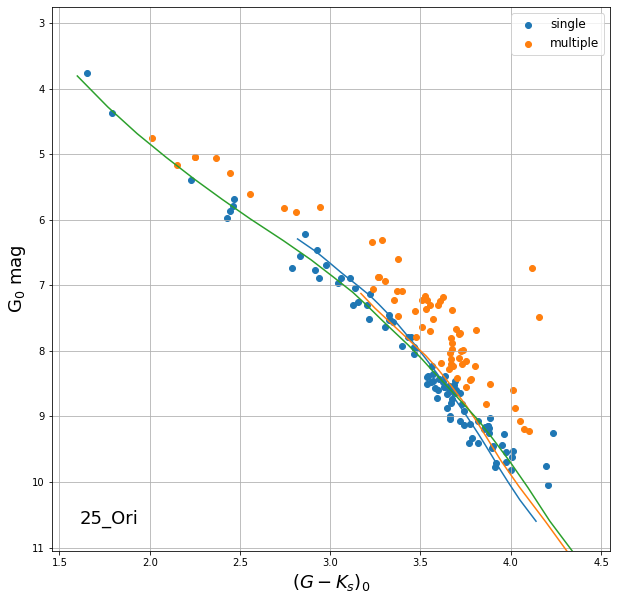

['0.355337799869706' '2.0' 'Assc50' '0'] 2.0 <class 'numpy.str_'> <class 'numpy.float64'>
['0.22084756695132676' '2.5' 'Assc50' '1'] 2.5 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
  4.433
  4.376
  4.309
  4.224
  4.139
  4.086
   4.04
  3.999
   3.96
  3.922
    ...
  3.036
  2.991
  2.947
  2.905
  2.864
  2.824
  2.784
  2.744
  2.706
   2.67
  2.637
Length = 41 rows Gmag_int
--------
   9.258
   8.893
   8.588
   8.368
   8.228
   8.152
   8.075
   7.993
   7.898
   7.802
     ...
   5.899
   5.817
   5.739
   5.664
    5.59
   5.517
   5.449
   5.382
   5.316
   5.253
    5.19
Length = 41 rows
['0.2416681402165106' '2.5' 'Assc50' '2'] 2.5 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
   5.09
  4.708
  4.507
  4.333
  4.137
  4.014
  3.915
  3.744
  3.654
  3.576
  3.402
  3.369 G_int 
------
10.383
 9.664
 9.166
 8.671
 8.217
 7.883
 7.594
  7.13
 6.858
 6.655
 6.158
 6.037
['0.30812407275429976' '3.0' 'Assc50' '3'] 3.0 <class 'numpy.str_'> <class 

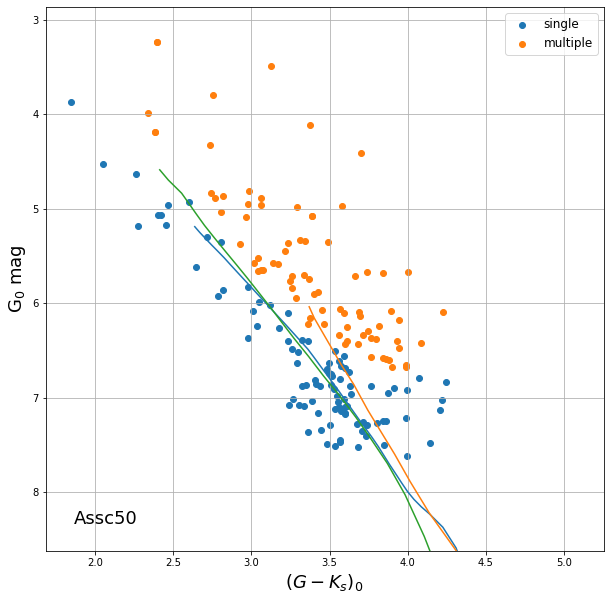

['0.16174258530029756' '44.0' 'Blanco1' '0'] 44.0 <class 'numpy.str_'> <class 'numpy.float64'>
['0.1584171860204781' '48.0' 'Blanco1' '1'] 48.0 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
  4.102
  3.972
  3.886
  3.821
  3.764
  3.723
  3.686
  3.651
  3.619
  3.589
    ...
  2.694
   2.55
  2.385
  2.222
  2.061
  1.921
  1.808
  1.732
  1.691
  1.663
  1.627
Length = 41 rows Gmag_int
--------
  11.941
  11.545
  11.233
  10.971
  10.761
  10.558
  10.377
  10.216
  10.067
   9.929
     ...
   7.126
    6.88
   6.626
   6.379
   6.138
   5.929
   5.763
   5.662
    5.62
   5.588
   5.528
Length = 41 rows
['0.12895736023463328' '79.5' 'Blanco1' '2'] 79.5 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
  4.301
  4.005
  3.843
   3.75
   3.68
  3.612
  3.544
  3.388
  3.279
  3.073
  2.578
  2.492 G_int 
------
12.493
11.603
11.036
10.604
10.254
 9.954
 9.665
 9.046
 8.644
 8.075
 6.796
 6.536
['0.0628920260681265' '123.0' 'Blanco1' '3'] 123.0 <class 'numpy

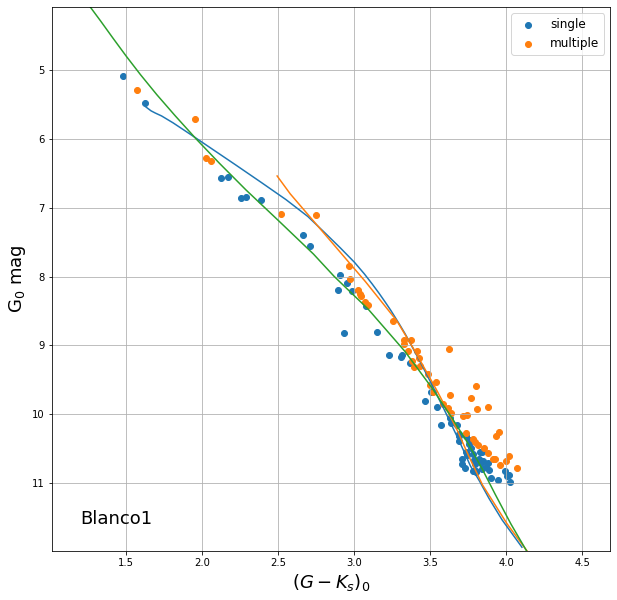

['0.16662397626801762' '1.0' 'Col197' '0'] 1.0 <class 'numpy.str_'> <class 'numpy.float64'>
['0.10846663763374523' '1.5' 'Col197' '1'] 1.5 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
  4.474
  4.422
  4.382
  4.327
  4.263
  4.213
  4.157
  4.097
  4.044
  3.996
    ...
  2.905
  2.861
  2.818
  2.776
  2.737
  2.698
  2.662
  2.628
  2.596
  2.565
  2.536
Length = 41 rows Gmag_int
--------
   9.228
   8.835
   8.502
   8.211
   7.916
   7.658
   7.441
   7.287
   7.199
   7.171
     ...
    5.35
   5.271
   5.194
    5.12
   5.052
   4.987
   4.924
   4.863
   4.802
   4.743
   4.684
Length = 41 rows
['0.14531337690518603' '1.5' 'Col197' '2'] 1.5 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
  5.117
  4.564
  4.478
  4.307
  4.174
  4.016
  3.956
  3.819
  3.729
  3.647
  3.472
  3.436 G_int 
------
10.315
  8.96
 8.643
 8.142
 7.765
 7.391
 7.196
 6.847
 6.567
 6.373
 5.907
 5.792
['0.21269603261785108' '1.0' 'Col197' '3'] 1.0 <class 'numpy.str_'> <cla

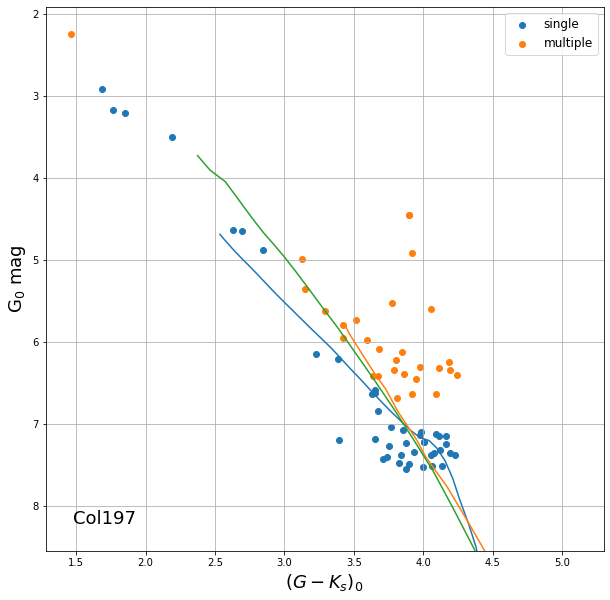

['0.40062115883523025' '1.5' 'NGC2244' '0'] 1.5 <class 'numpy.str_'> <class 'numpy.float64'>
['0.21025659122824103' '1.5' 'NGC2244' '1'] 1.5 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
  4.474
  4.422
  4.382
  4.327
  4.263
  4.213
  4.157
  4.097
  4.044
  3.996
    ...
  2.905
  2.861
  2.818
  2.776
  2.737
  2.698
  2.662
  2.628
  2.596
  2.565
  2.536
Length = 41 rows Gmag_int
--------
   9.228
   8.835
   8.502
   8.211
   7.916
   7.658
   7.441
   7.287
   7.199
   7.171
     ...
    5.35
   5.271
   5.194
    5.12
   5.052
   4.987
   4.924
   4.863
   4.802
   4.743
   4.684
Length = 41 rows
['0.0622854223675651' '1.0' 'NGC2244' '2'] 1.0 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
  5.122
  4.393
  4.344
  4.277
  4.148
  4.097
  4.015
   3.85
   3.76
  3.709
  3.537
  3.481 G_int 
------
10.295
 8.451
 7.968
 7.558
 7.269
 7.148
  6.94
 6.605
 6.314
 6.185
 5.743
 5.607
['0.4313110083963053' '2.0' 'NGC2244' '3'] 2.0 <class 'numpy.str_'> <c

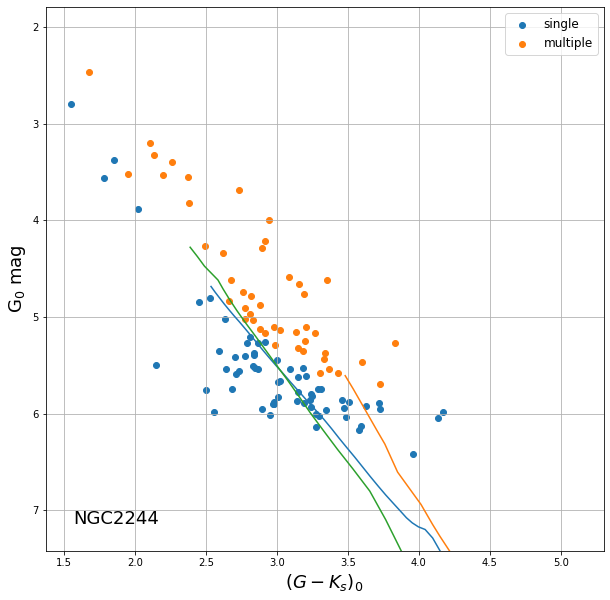

['0.27519692697310855' '3.5' 'NGC2264' '0'] 3.5 <class 'numpy.str_'> <class 'numpy.float64'>
['0.1980136709444167' '4.0' 'NGC2264' '1'] 4.0 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
  4.343
  4.228
  4.137
   4.07
  4.031
  3.988
  3.949
  3.912
  3.876
  3.842
    ...
  3.136
  3.096
  3.056
  3.017
  2.978
   2.94
  2.902
  2.865
  2.827
   2.79
  2.752
Length = 41 rows Gmag_int
--------
   9.444
   9.282
    9.11
   8.969
   8.831
   8.694
   8.563
   8.441
   8.319
   8.203
     ...
   6.357
   6.281
   6.206
   6.132
   6.064
   5.997
   5.931
   5.864
   5.792
    5.72
   5.646
Length = 41 rows
['0.16095407657186617' '6.0' 'NGC2264' '2'] 6.0 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
    4.7
  4.457
  4.321
  4.197
  4.073
  3.982
  3.886
  3.692
  3.602
  3.526
   3.33
  3.288 G_int 
------
10.721
10.089
 9.599
 9.191
 8.847
 8.557
 8.269
 7.744
 7.475
 7.259
 6.708
 6.572
['0.21290388036758937' '5.5' 'NGC2264' '3'] 5.5 <class 'numpy.str_'> <

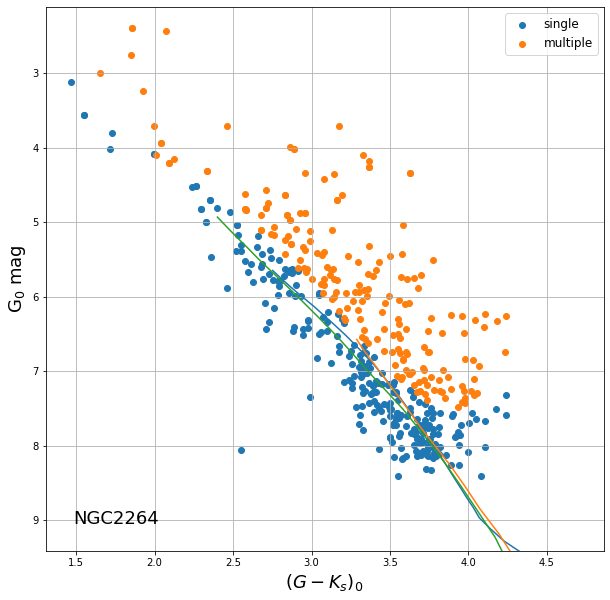

['0.057561030608770616' '75.5' 'NGC2516' '0'] 75.5 <class 'numpy.str_'> <class 'numpy.float64'>
['0.06490274445561721' '82.0' 'NGC2516' '1'] 82.0 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
  4.158
  3.999
   3.89
  3.814
  3.757
   3.71
  3.667
  3.627
  3.591
  3.558
    ...
  2.367
  2.321
  2.251
   2.16
  2.064
  1.983
  1.908
  1.838
   1.77
  1.708
  1.653
Length = 41 rows Gmag_int
--------
  12.394
   11.98
  11.647
  11.381
  11.141
  10.928
  10.744
  10.578
  10.426
  10.285
     ...
   6.947
   6.862
   6.736
   6.575
   6.408
   6.255
   6.111
   5.973
   5.837
   5.705
   5.578
Length = 41 rows
['0.0802936696106765' '130.0' 'NGC2516' '2'] 130.0 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
  4.336
  3.984
  3.817
   3.71
  3.633
  3.561
  3.483
  3.268
  3.102
  2.957
  2.619
   2.51 G_int 
------
12.911
11.942
11.339
10.889
10.528
10.188
 9.839
 8.977
 8.448
 8.058
 6.915
 6.537
['0.0341766734457879' '141.5' 'NGC2516' '3'] 141.5 <class 'nu

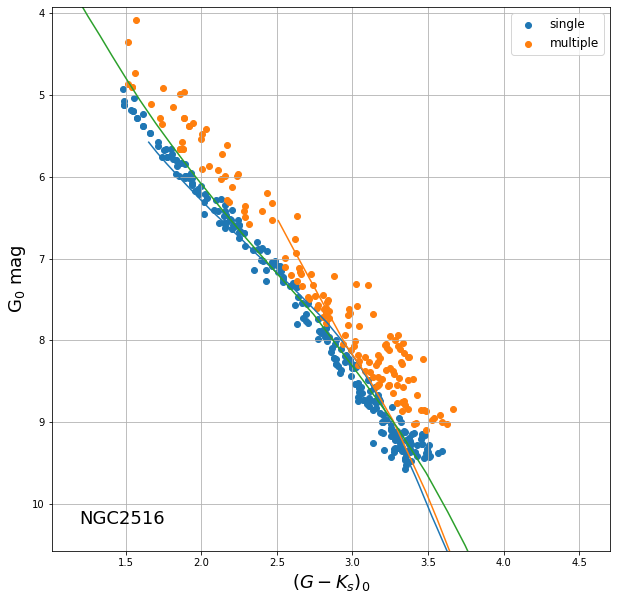

['0.1724277648416049' '19.0' 'NGC2547' '0'] 19.0 <class 'numpy.str_'> <class 'numpy.float64'>
['0.07663464253645763' '18.0' 'NGC2547' '1'] 18.0 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
  4.093
   3.99
  3.922
  3.869
  3.825
  3.788
  3.752
  3.719
  3.688
  3.658
    ...
  3.132
  3.099
  3.064
  3.027
  2.986
  2.942
  2.892
  2.831
  2.756
  2.673
  2.589
Length = 41 rows Gmag_int
--------
  11.095
  10.755
  10.477
  10.239
  10.027
    9.84
   9.674
   9.523
   9.384
   9.255
     ...
    7.39
   7.302
    7.21
   7.117
    7.02
   6.918
   6.806
   6.683
   6.549
   6.405
   6.257
Length = 41 rows
['0.05053839412952445' '31.0' 'NGC2547' '2'] 31.0 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
  4.297
  4.068
  3.931
   3.84
  3.768
  3.718
  3.663
  3.557
  3.505
  3.447
  3.085
  2.989 G_int 
------
11.731
 10.95
10.413
10.003
 9.683
 9.415
 9.168
 8.729
 8.531
 8.332
 7.377
 7.081
['0.03656246568254711' '40.0' 'NGC2547' '3'] 40.0 <class 'numpy.

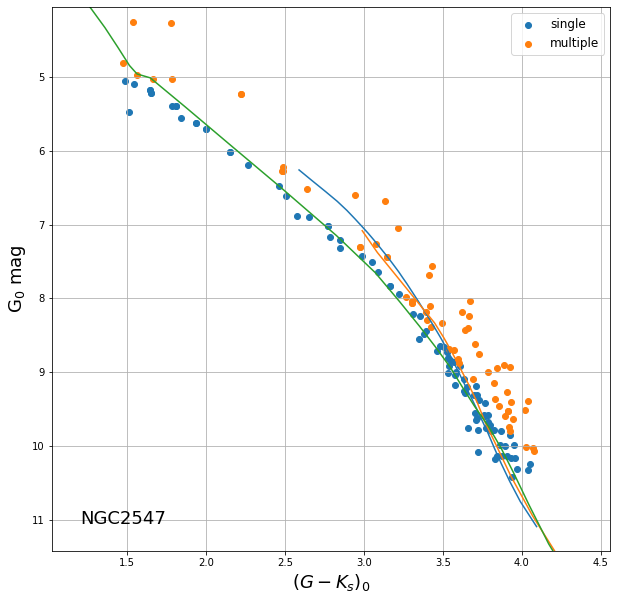

['0.161384407191526' '53.0' 'NGC3532' '0'] 53.0 <class 'numpy.str_'> <class 'numpy.float64'>
['0.11690668950748341' '56.5' 'NGC3532' '1'] 56.5 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
  4.116
  3.979
  3.887
  3.818
  3.761
   3.72
  3.681
  3.645
  3.611
   3.58
    ...
  2.486
  2.321
  2.165
  2.029
  1.935
  1.883
  1.849
  1.811
  1.759
  1.701
  1.646
Length = 41 rows Gmag_int
--------
  12.079
  11.678
  11.357
  11.095
  10.879
  10.672
   10.49
  10.327
  10.178
  10.039
     ...
   6.893
   6.647
   6.419
   6.225
   6.094
   6.026
   5.981
   5.915
   5.815
   5.696
   5.576
Length = 41 rows
['0.14590525893640133' '82.5' 'NGC3532' '2'] 82.5 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
  4.302
  4.003
  3.841
  3.748
  3.676
  3.608
   3.54
  3.379
  3.266
  3.048
  2.592
  2.494 G_int 
------
12.525
11.629
 11.06
10.627
10.278
 9.975
 9.682
 9.047
  8.63
  8.04
  6.85
 6.536
['0.10590360748496655' '85.5' 'NGC3532' '3'] 85.5 <class 'numpy.s

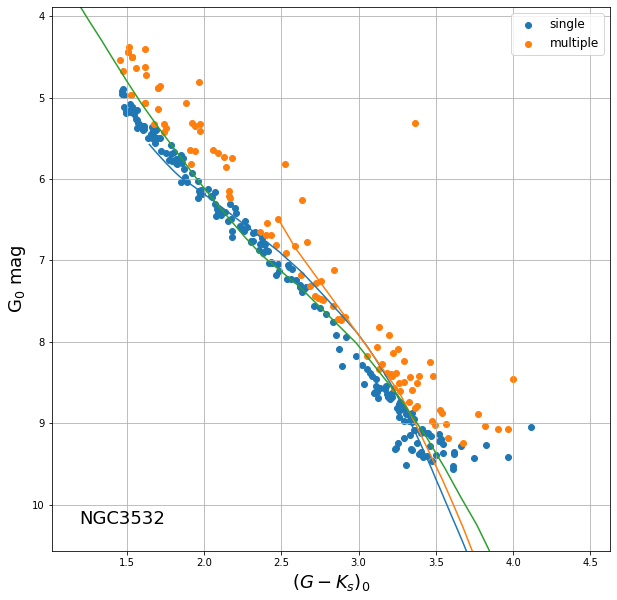

['0.52029816844218' '1.0' 'NGC6530' '0'] 1.0 <class 'numpy.str_'> <class 'numpy.float64'>
['0.2573512825273635' '1.0' 'NGC6530' '1'] 1.0 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
  4.488
  4.454
  4.418
  4.373
  4.314
  4.269
   4.22
  4.154
  4.089
  4.025
    ...
  2.798
  2.757
  2.719
  2.682
  2.648
  2.615
  2.583
  2.553
  2.524
  2.497
  2.474
Length = 41 rows Gmag_int
--------
   9.209
   8.827
    8.49
   8.188
   7.878
   7.596
   7.338
   7.102
   6.875
   6.671
     ...
   4.887
   4.817
   4.749
   4.684
   4.621
   4.559
   4.501
   4.444
   4.389
   4.336
   4.289
Length = 41 rows
['0.1658866300437573' '1.0' 'NGC6530' '2'] 1.0 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
  5.122
  4.393
  4.344
  4.277
  4.148
  4.097
  4.015
   3.85
   3.76
  3.709
  3.537
  3.481 G_int 
------
10.295
 8.451
 7.968
 7.558
 7.269
 7.148
  6.94
 6.605
 6.314
 6.185
 5.743
 5.607
['0.6398034222652695' '1.0' 'NGC6530' '3'] 1.0 <class 'numpy.str_'> <class

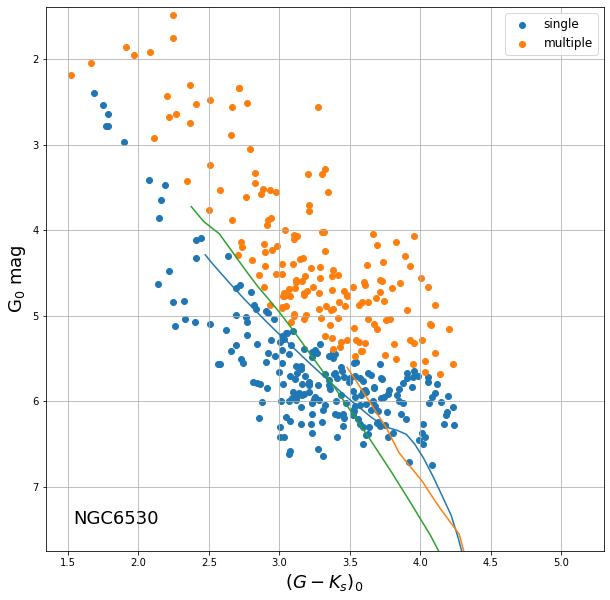

['0.018359937344712748' '1.0' 'NGC6705' '0'] 1.0 <class 'numpy.str_'> <class 'numpy.float64'>
['0.00016376741970592634' '1.0' 'NGC6705' '1'] 1.0 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
  4.488
  4.454
  4.418
  4.373
  4.314
  4.269
   4.22
  4.154
  4.089
  4.025
    ...
  2.798
  2.757
  2.719
  2.682
  2.648
  2.615
  2.583
  2.553
  2.524
  2.497
  2.474
Length = 41 rows Gmag_int
--------
   9.209
   8.827
    8.49
   8.188
   7.878
   7.596
   7.338
   7.102
   6.875
   6.671
     ...
   4.887
   4.817
   4.749
   4.684
   4.621
   4.559
   4.501
   4.444
   4.389
   4.336
   4.289
Length = 41 rows
['0.002148590826805597' '1.0' 'NGC6705' '2'] 1.0 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
  5.122
  4.393
  4.344
  4.277
  4.148
  4.097
  4.015
   3.85
   3.76
  3.709
  3.537
  3.481 G_int 
------
10.295
 8.451
 7.968
 7.558
 7.269
 7.148
  6.94
 6.605
 6.314
 6.185
 5.743
 5.607
['0.020141859242623666' '1.0' 'NGC6705' '3'] 1.0 <class 'numpy.s

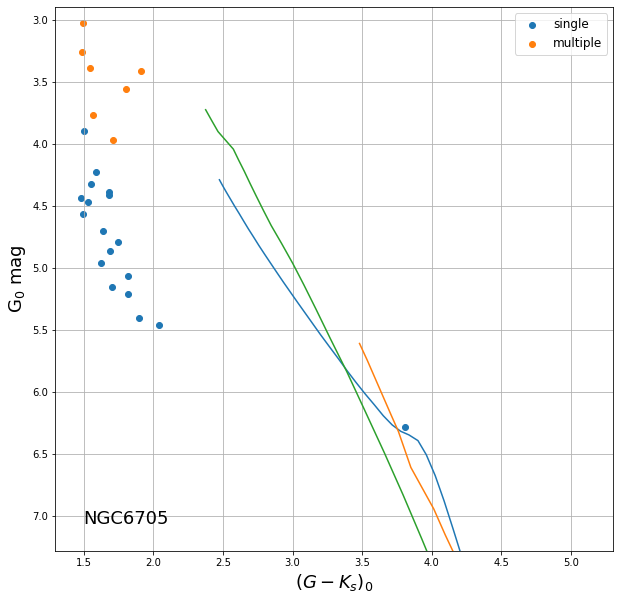

['0.7996860460523064' '1.0' 'Trumpler14' '0'] 1.0 <class 'numpy.str_'> <class 'numpy.float64'>
['0.6749477960917245' '1.0' 'Trumpler14' '1'] 1.0 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
  4.488
  4.454
  4.418
  4.373
  4.314
  4.269
   4.22
  4.154
  4.089
  4.025
    ...
  2.798
  2.757
  2.719
  2.682
  2.648
  2.615
  2.583
  2.553
  2.524
  2.497
  2.474
Length = 41 rows Gmag_int
--------
   9.209
   8.827
    8.49
   8.188
   7.878
   7.596
   7.338
   7.102
   6.875
   6.671
     ...
   4.887
   4.817
   4.749
   4.684
   4.621
   4.559
   4.501
   4.444
   4.389
   4.336
   4.289
Length = 41 rows
['0.1618269334653202' '1.0' 'Trumpler14' '2'] 1.0 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
  5.122
  4.393
  4.344
  4.277
  4.148
  4.097
  4.015
   3.85
   3.76
  3.709
  3.537
  3.481 G_int 
------
10.295
 8.451
 7.968
 7.558
 7.269
 7.148
  6.94
 6.605
 6.314
 6.185
 5.743
 5.607
['0.5823800405451518' '1.0' 'Trumpler14' '3'] 1.0 <class 'numpy

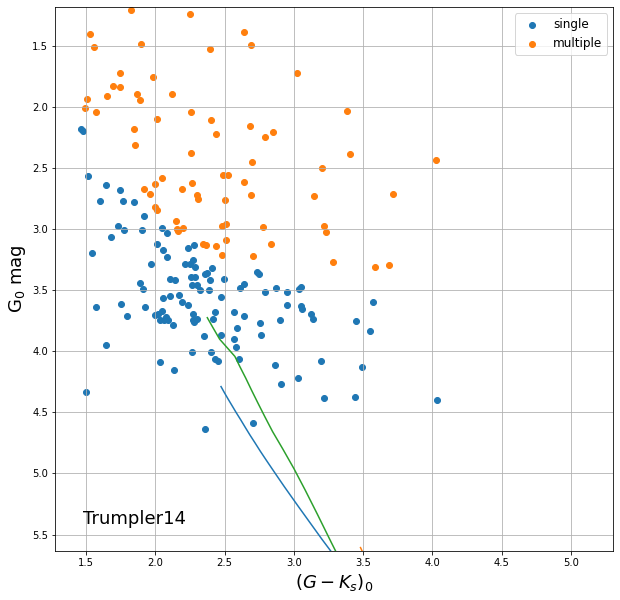

['0.13975467029558644' '6.5' 'gamma2_Vel' '0'] 6.5 <class 'numpy.str_'> <class 'numpy.float64'>
['0.06608114598663373' '7.5' 'gamma2_Vel' '1'] 7.5 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
  4.183
  4.088
  4.019
   3.97
  3.928
  3.888
  3.852
  3.817
  3.785
  3.754
    ...
  3.186
  3.153
   3.12
  3.086
  3.051
  3.017
  2.983
  2.948
  2.912
  2.872
  2.831
Length = 41 rows Gmag_int
--------
  10.306
  10.021
   9.775
   9.574
   9.385
   9.207
   9.049
   8.908
   8.774
   8.649
     ...
   6.881
   6.812
   6.741
    6.67
   6.599
   6.528
   6.455
   6.381
   6.306
   6.231
   6.152
Length = 41 rows
['0.10990254866877808' '13.0' 'gamma2_Vel' '2'] 13.0 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
  4.434
  4.256
  4.112
  4.002
  3.926
  3.862
  3.802
  3.685
  3.616
   3.54
  3.281
  3.216 G_int 
------
11.159
10.471
 9.943
 9.532
 9.211
 8.943
 8.709
 8.324
 8.111
 7.895
 7.212
 7.017
['0.09551671755724656' '11.5' 'gamma2_Vel' '3'] 11.5 <clas

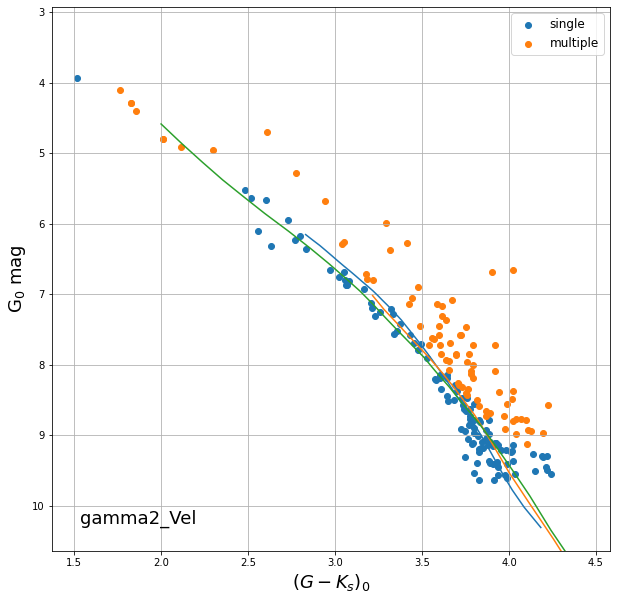

['0.155582240147915' '4.5' 'lam_Ori' '0'] 4.5 <class 'numpy.str_'> <class 'numpy.float64'>
['0.12395459439180831' '5.5' 'lam_Ori' '1'] 5.5 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
  4.246
   4.14
  4.064
   4.02
  3.974
  3.933
  3.895
  3.859
  3.824
  3.791
    ...
   3.17
  3.135
  3.099
  3.063
  3.027
  2.992
  2.958
  2.923
  2.887
  2.848
  2.808
Length = 41 rows Gmag_int
--------
   9.936
   9.692
   9.461
   9.293
   9.116
   8.953
   8.805
   8.671
   8.543
   8.423
     ...
   6.642
   6.568
   6.493
   6.418
   6.345
   6.278
    6.21
   6.142
   6.074
   6.005
   5.933
Length = 41 rows
['0.07767091171625895' '8.5' 'lam_Ori' '2'] 8.5 <class 'numpy.str_'> <class 'numpy.float64'>
GKs_int
-------
  4.541
  4.343
   4.22
  4.097
  4.002
  3.933
  3.864
  3.701
  3.608
  3.524
  3.311
   3.26 G_int 
------
10.887
10.239
 9.746
  9.33
 9.009
 8.746
 8.498
 8.029
 7.765
 7.537
 6.943
 6.784
['0.09729485577472118' '7.5' 'lam_Ori' '3'] 7.5 <class 'numpy.str_'> <c

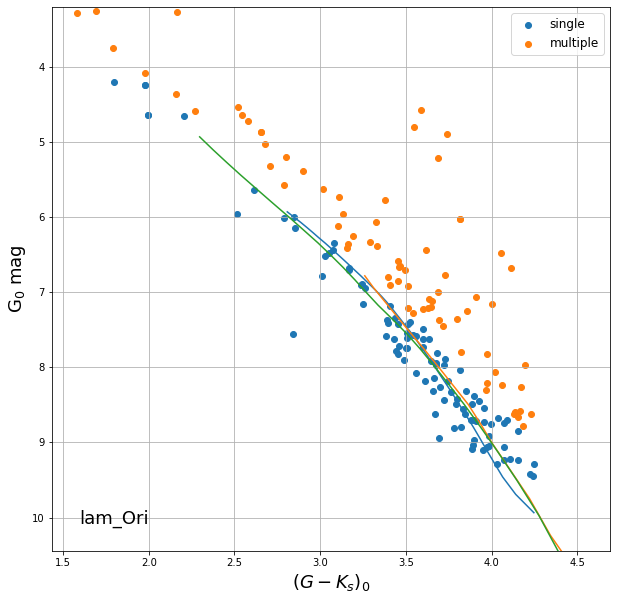

In [163]:
res_GKs = np.array(res)
print(res_GKs.shape)
print(res_GKs[0:,0:,2])

print(model_list, GKs_mod)



def plot_models(f, CMD, res_mod, list_mod, col_mod, mag_mod, age):
    for h, i in enumerate(np.unique(f["CLUSTER"])):
        s = ((f["CLUSTER"] == i) & (f["bflag"] == 1))
        b = ((f["CLUSTER"] == i) & (f["bflag"] == 2))
        g = res_mod[res_mod[0:,0:,2] == i]
        fig, ax = plt.subplots(figsize=(10,10))
        ax.set_ylim(max(f[s]["M_G"])+1,min(f[s]["M_G"])-1)
        ax.fontsize=20
        ax.set_ylabel("G$_{0}$ mag", fontsize=18)
        ax.set_xlabel(CMD[0], fontsize=18)
        ax.grid()
        ax.text(0.05, 0.05, i, transform=ax.transAxes, fontsize=18)
        ax.scatter(f[s][CMD[1]], f[s]["M_G"], label='single')
        ax.scatter(f[b][CMD[1]], f[b]["M_G"], label='multiple')
        G_mod    = ["Gmag", "Gmag_int", "G_int", "absG"]
        GKs_mod  = ["GKs", "GKs_int", "GKs_int", "GKs"]
        for k, z in enumerate(g):
            p = Table.read(model_list[k], format='ascii')
            p[age[k]].dtype = float
            z_x = z[1].astype(float)
            print(z, z[1], type(z[1]), type(z_x))
            if (k > 0):
                if k < 3:
                    m_plot = p[p[age[k]] == z_x]
                if k == 3:
                    m_plot = p[(p[age[k]] == z_x) & (p["beta"] == 0.3)]
                print(m_plot[GKs_mod[k]], m_plot[G_mod[k]])
                ax.plot(m_plot[GKs_mod[k]], m_plot[G_mod[k]])
#            print(type(z_x))
#            print(p[age[k]].dtype, z[1].dtype)
#            print(p[p[float(age[k]) < 1.1]])#, z[1])
#            print(p[age[k]].dtype)
#            p_x = p[age[k]]# == z_x]
#            print(p_x)
#            print(k, p[p[age[k]] == z[1]])
        ax.legend(fontsize=12)
    
        plt.show()


CMD1 = ["($G-K_{s})_0$", "GKs_0"]
CMD2 = ["($BP-RP)_0$", "BPRP_0"]
plot_models(GES_Final_GKs, CMD1, res_GKs, model_list, GKs_mod, G_mod, age)
#make_plots_single_stars(GES_Final_BPRP, CMD2, pol_BPRP_f)
